In [1]:
# Kütüphaneler

import numpy as np
import pandas as pd
import re as re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/test_x.csv')
df.shape

(11049, 43)

In [3]:
df.head(5)

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2023,Kadın,21.06.2002 00:00,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,...,Takım Oyuncusu,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0
1,2023,Kadın,11.05.2004 00:00,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,...,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1
2,2023,Erkek,24.04.2002 00:00,İstanbul,İstanbul,Kapadokya Üniversitesi,Özel,NaN,Evet,Diğer,...,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,2
3,2023,Erkek,11.03.2003 00:00,Mardin,Mardin,Mardin Artuklu Üniversitesi,Devlet,NaN,Hayır,İslami İlimler,...,-,Evet,Lise gezilerde liderlik yapıyordum,NaN,Hayır,-,Hayır,NaN,NaN,3
4,2023,Erkek,26.01.2002 00:00,Samsun,İstanbul,Boğaziçi Üniversitesi,Devlet,NaN,Hayır,İşletme,...,-,Evet,"Toplum Gönüllüleri Vakfı'nda ""Yol Arkadaşım"" P...",NaN,Evet,"12 aydır, yolculuğuna bir yıl önce başlamış ol...",Evet,NaN,NaN,4


In [4]:
df.columns

Index(['Basvuru Yili', 'Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri',
       'Ikametgah Sehri', 'Universite Adi', 'Universite Turu',
       'Burslu ise Burs Yuzdesi', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Hangi STK'nin Uyesisiniz?', 'Stk Projesine Katildin

In [5]:
# types of column data
df.dtypes

Basvuru Yili                                                   int64
Cinsiyet                                                      object
Dogum Tarihi                                                  object
Dogum Yeri                                                    object
Ikametgah Sehri                                               object
Universite Adi                                                object
Universite Turu                                               object
Burslu ise Burs Yuzdesi                                      float64
Burs Aliyor mu?                                               object
Bölüm                                                         object
Universite Kacinci Sinif                                      object
Universite Not Ortalamasi                                     object
Daha Once Baska Bir Universiteden Mezun Olmus                float64
Lise Adi                                                      object
Lise Adi Diger                    

In [6]:
df.isnull().sum()  # veride eksik değer içeren sütun var mı 

Basvuru Yili                                                     0
Cinsiyet                                                         0
Dogum Tarihi                                                     0
Dogum Yeri                                                       0
Ikametgah Sehri                                                  0
Universite Adi                                                   0
Universite Turu                                                  0
Burslu ise Burs Yuzdesi                                      11049
Burs Aliyor mu?                                                  0
Bölüm                                                            0
Universite Kacinci Sinif                                         0
Universite Not Ortalamasi                                        0
Daha Once Baska Bir Universiteden Mezun Olmus                11049
Lise Adi                                                         0
Lise Adi Diger                                               1

In [7]:
def statistical_analysis(df, column_name):
    # Sütun için istatistiksel analiz yapma
    column_data = df[column_name]

    # Mod hesaplama
    mode_value = column_data.mode()[0]

    # Ortalama hesaplama
    mean_value = column_data.mean()

    # Medyan hesaplama
    median_value = column_data.median()

    # Standart sapma hesaplama
    std_value = column_data.std()

    # Sonuçları yazdırma
    print("Sütun Adı:", column_name)
    print("Mod:", mode_value)
    print("Ortalama:", mean_value)
    print("Medyan:", median_value)
    print("Standart Sapma:", std_value)


# Sütunlara ait histogram grafikleri
def his_grap(df, column_name):
    # Sütun için istatistiksel analiz yapma
    column_data = df[column_name]

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=True, color='green')
    plt.title('Histogram - ' + column_name)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


In [8]:
# Dataframe'de ilgili sütundaki aykırı verilerin temizlenmesi için fonksiyon oluşturulmuştur.

def outliers_remove_with_iqr(column_name, df):
    Q1 = df[column_name].quantile(0.25)  # ilk çeyreklik
    Q3 = df[column_name].quantile(0.75)  # üçüncü çeyreklik
    IQR = Q3 - Q1 # QR (Interquartile Range) hesaplanır
    print(f"Q1: {Q1} / Q3: {Q3} / IQR: {IQR}") 
    # IQR kullanılarak aykırı değerlerin sınırları belirlenir. 
    aykiri_Q3tenbuyuk = Q3 + 1.5*IQR  # bir değer, Q1'den 1.5 * IQR çıkarıldığında daha küçükse bu değer bir aykırı değer olarak kabul edilir
    aykiri_Q1denkucuk = Q1 - 1.5*IQR  # bir değer, Q3'ten 1.5 * IQR eklenerek daha büyükse bu değer bir aykırı değer olarak kabul edilir
    print(f"Q3'ten büyük aykırı değer: {aykiri_Q3tenbuyuk} / Q1'den küçük aykırı değer: {aykiri_Q1denkucuk}")

    # mantıksal sınamanın true olduğu durumaları döndürür
    print("Mantıksal sınamaya göre aykırı değerlerin sayısı:")
    print(np.where(df[column_name] > aykiri_Q3tenbuyuk)[0].shape , np.where(df[column_name] < aykiri_Q1denkucuk)[0].shape)

    # Belirlenen aykırı değerler bir koşul ile birlikte veri setinden temizlenir.
    # Koşul belirlenir
    condition = ~((df[column_name] > aykiri_Q3tenbuyuk) | (df[column_name] < aykiri_Q1denkucuk)) # Aykırı verilerin dışında olan veriler belirlenir
    # Bu koşulu sağlan veriler ile yeni dataframe oluşturulmuş olur.
    df = df.loc[condition]
    print("Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.")
    
    return df  # aykırı değer temizlenmiş veri seti döndürülür
    

In [9]:
# İlgili sütunun ortalam Değerlendirme puanı için çizgi gradfiği fonksiyonu

def plot_average_scores(df, ortalama_sutun, degerlendirme_sutun):
    # Yıl bazında ortalama puanları hesaplama
    ortalama_puanlar = df.groupby(ortalama_sutun)[degerlendirme_sutun].mean()

    # Çizgi grafiği oluşturma
    plt.figure(figsize=(10, 6))
    plt.plot(ortalama_puanlar.index, ortalama_puanlar.values, marker='o', linestyle='-', color='b')
    plt.title(f'{ortalama_sutun} Göre Ortalama {degerlendirme_sutun}')
    plt.xlabel(ortalama_sutun)
    plt.ylabel(f'Ortalama {degerlendirme_sutun}')
    plt.grid(True)
    plt.show()

# Örnek kullanım:
# plot_average_scores(df, 'Universite Not Ortalamasi', 'Degerlendirme Puani')

In [10]:
import matplotlib.pyplot as plt

def scatter_plot(df, x_column, y_column):
    """
    Verilen DataFrame'den iki sütunu kullanarak scatter plot oluşturur.

    Parametreler:
    df: pandas DataFrame - Grafik için veri.
    x_column: str - X ekseni için kullanılacak sütun adı.
    y_column: str - Y ekseni için kullanılacak sütun adı.
    """
    plt.scatter(df[x_column], df[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} vs {y_column}")
    plt.show()

# scatter_plot(df, 'X_degisken', 'Y_degisken')


## 'Basvuru Yili' Sütunu 

* Eksik ve aykırı veri yok. 
* Veri tipi makine öğrenimi modelleri için uygun.
* Başvuru Yılına göre başvurusu sayısı için histogram grafiğine bakıldı.
* Başvuru Yılına göre Değerlendirme Puanları'nın ortalamaları grafik aracılığıyla kontrol edildi.

In [11]:
df['Basvuru Yili'].describe()

count    11049.0
mean      2023.0
std          0.0
min       2023.0
25%       2023.0
50%       2023.0
75%       2023.0
max       2023.0
Name: Basvuru Yili, dtype: float64

In [12]:
df['Basvuru Yili'].unique()

array([2023], dtype=int64)

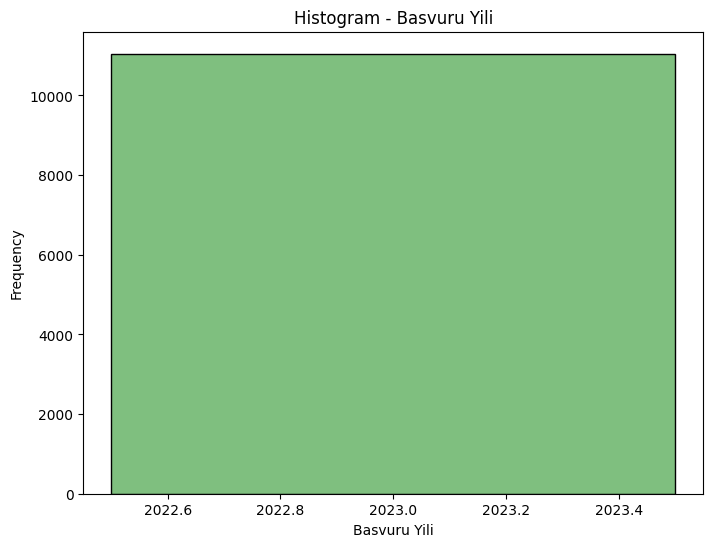

In [13]:
his_grap(df,"Basvuru Yili")

<Axes: >

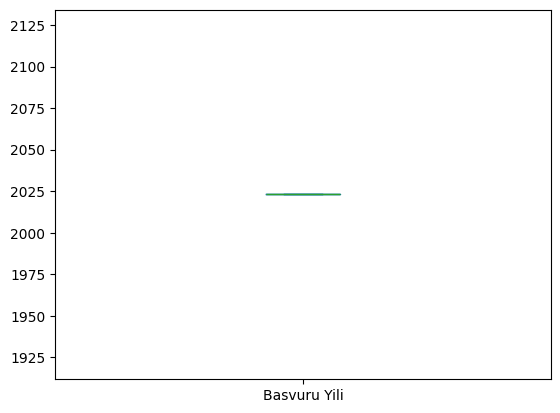

In [14]:
# Kutu grafiği çizdirilir, aykırı değer yok.
df['Basvuru Yili'].plot(kind='box')  

## 'Cinsiyet' sütunu

* Verileri daha düzenli hale getirmek için aynı anlam taşıyan farklı şekillerde yazılmış veriler aynı formata dönüştürüldü.
* Cinsiyet bilgisinin değerlendirme puanına etki etmeyeceği düşünüldüğünden işleme dahil edilmemiştir.


In [15]:
df['Cinsiyet'].describe()

count     11049
unique        3
top       Kadın
freq       6378
Name: Cinsiyet, dtype: object

In [16]:
df['Cinsiyet'].unique()

array(['Kadın', 'Erkek', 'Belirtmek istemiyorum'], dtype=object)

In [17]:
# Veriler daha düzenli hale getirilir
# 'Cinsiyet' sütunundaki değerleri küçük harfe çevirip baş harfi büyültme
df['Cinsiyet'] = df['Cinsiyet'].str.strip().str.capitalize()

# Değişiklikleri kontrol etme
print(df['Cinsiyet'].value_counts())

Cinsiyet
Kadın                    6378
Erkek                    4654
Belirtmek istemiyorum      17
Name: count, dtype: int64


## 'Dogum Tarihi' sütunu

* Eksik veriler silinmiştir.
* Verileri daha düzenli hale getirmek için aynı anlam taşıyan farklı şekillerde yazılmış veriler aynı formata dönüştürüldü. Sadece 4 haneli yıl bilgileri alınmıştır.
* Bazı tarihlerin format dönüşümü doğru şekilde çerilemeyince 2939 tane veri NaN olarak döndürülüyordu. Bu verileri doldurmak için ilgili satırın Başvuru Yili sütununa bakılarak o yıldaki çok tekrar eden doğum yılına göre doldurulmuştur.
* Aykırı Doğum Tarihi sütunundaki değerler IQR yöntemi ile tespit edilip silinmiştir. 
(Q1: 1995.0 / Q3: 2000.0 / IQR: 5.0
Q3'ten büyük aykırı değer: 2007.5 / Q1'den küçük aykırı değer: 1987.5
Mantıksal sınamaya göre aykırı değerlerin sayısı:
(49,) (1794,)
Aykırı değerlerin sayısı sıfırlanana kadar fonksiyon çalıştırılır, veri seti yenilenir.)

* Doğum 

In [18]:
df['Dogum Tarihi'].describe()

count               11049
unique               2135
top       1.01.2002 00:00
freq                  135
Name: Dogum Tarihi, dtype: object

In [19]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Dogum Tarihi"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Dogum Tarihi
1.01.2002 00:00     135
1.01.2001 00:00      98
1.01.2003 00:00      87
1.01.2000 00:00      78
1.01.2004 00:00      54
3.03.2003 00:00      24
1.01.1999 00:00      24
1.11.1998 00:00      23
2.01.2002 00:00      22
1.03.2002 00:00      21
2.01.2001 00:00      19
1.08.2001 00:00      18
5.04.2002 00:00      18
1.01.2005 00:00      17
3.01.2002 00:00      17
15.03.2004 00:00     17
1.08.2003 00:00      17
18.06.2002 00:00     17
1.03.2001 00:00      17
10.07.2002 00:00     16
1.05.2001 00:00      16
1.04.2002 00:00      16
14.01.2003 00:00     16
15.01.2001 00:00     16
5.09.2002 00:00      15
25.05.2002 00:00     15
6.06.2001 00:00      15
1.02.2002 00:00      15
1.09.2001 00:00      15
16.05.2002 00:00     15
1.09.2003 00:00      15
30.01.2002 00:00     15
1.03.2003 00:00      15
8.01.2001 00:00      15
1.05.2002 00:00      15
15.07.2002 00:00     15
16.08.2001 00:00     15
1.07.2002 00:00      15
5.01.2000 00:00      14
20.01.2003 00:00     14
8.08.2001 00:00      14
5.0

In [20]:
# 'Doğum Tarihi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Dogum Tarihi'].isna().sum()
nan_count

0

In [21]:
# Dogum Tarihi sütunundaki eksik değerleri içeren satırlar silinir
df = df.dropna(subset=['Dogum Tarihi'])

In [22]:
# 'Dogum Tarihi' sütununu datetime formatına çevir
df['Dogum Tarihi'] = pd.to_datetime(df['Dogum Tarihi'], format='%d.%m.%Y %H:%M')

# Yalnızca yıl bilgisini al ve sütuna geri yaz
df['Dogum Tarihi'] = df['Dogum Tarihi'].dt.year

# Sonucu kontrol etmek için
print(df['Dogum Tarihi'])


0        2002
1        2004
2        2002
3        2003
4        2002
         ... 
11044    2002
11045    2001
11046    2004
11047    2001
11048    1999
Name: Dogum Tarihi, Length: 11049, dtype: int32


In [23]:
df['Dogum Tarihi'].describe()

count    11049.000000
mean      2001.726310
std          1.440039
min       1998.000000
25%       2001.000000
50%       2002.000000
75%       2003.000000
max       2005.000000
Name: Dogum Tarihi, dtype: float64

In [24]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Dogum Tarihi"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Dogum Tarihi
2002    2779
2001    2448
2003    2302
2000    1485
2004    1220
1999     660
1998     119
2005      36


In [25]:
# Basvuru Yili sütununa göre yaş hesaplama fonksiyonu
def calculate_age(row):
    if pd.notna(row['Dogum Tarihi']):
        return row['Basvuru Yili'] - row['Dogum Tarihi']
    else:
        return np.nan

# 'Başvuru Yili'ne göre 'Dogum Tarihi' kullanarak yaş hesaplama
df['Basvuru Yilindaki Yas'] = df.apply(calculate_age, axis=1)

In [26]:
df.head(5)

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,...,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id,Basvuru Yilindaki Yas
0,2023,Kadın,2002,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,...,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0,21
1,2023,Kadın,2004,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,...,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1,19
2,2023,Erkek,2002,İstanbul,İstanbul,Kapadokya Üniversitesi,Özel,NaN,Evet,Diğer,...,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,2,21
3,2023,Erkek,2003,Mardin,Mardin,Mardin Artuklu Üniversitesi,Devlet,NaN,Hayır,İslami İlimler,...,Evet,Lise gezilerde liderlik yapıyordum,NaN,Hayır,-,Hayır,NaN,NaN,3,20
4,2023,Erkek,2002,Samsun,İstanbul,Boğaziçi Üniversitesi,Devlet,NaN,Hayır,İşletme,...,Evet,"Toplum Gönüllüleri Vakfı'nda ""Yol Arkadaşım"" P...",NaN,Evet,"12 aydır, yolculuğuna bir yıl önce başlamış ol...",Evet,NaN,NaN,4,21


## 'Basvuru Yilindaki Yas' Sütunu

* Başvuru yılında yaşı 17'den küçük olan satırlar silinmiştir.
* Makine öğrenimi modeline 'Doğum Tarihi' yerine bu sütun dahil edilecektir.

In [27]:
df['Basvuru Yilindaki Yas'].describe()

count    11049.000000
mean        21.273690
std          1.440039
min         18.000000
25%         20.000000
50%         21.000000
75%         22.000000
max         25.000000
Name: Basvuru Yilindaki Yas, dtype: float64

In [28]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Basvuru Yilindaki Yas"].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Basvuru Yilindaki Yas
21    2779
22    2448
20    2302
23    1485
19    1220
24     660
25     119
18      36


In [29]:
df['Basvuru Yilindaki Yas'].unique()

array([21, 19, 20, 22, 23, 24, 25, 18], dtype=int64)

## 'Ikametgah Sehri' sütunu

* Verilerin yazılış formatı düzenlendi. 
* Eksik veriler en çok tekrar eden değer ile dolduruldu.
* Ikametgah Sehri göre Değerlendirme Puanları'nın ortalamaları grafik aracılığıyla kontrol edildi. 
* Ikametgah Sehri bilgisinin değerlendirme puanına etki etmeyeceği düşünüldüğünden işleme dahil edilmemiştir.

In [30]:
df['Ikametgah Sehri'].describe()

count        11049
unique          83
top       İstanbul
freq          3301
Name: Ikametgah Sehri, dtype: object

In [31]:
# 'Ikametgah Sehri' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Ikametgah Sehri'].isna().sum()
nan_count

0

In [32]:
# NaN değerlerini en çok tekrar eden ile doldurulur
# 'Ikametgah Sehri' sütunundaki eksik değerler, en çok tekrar eden değerle doldurulur
most_common_embarked = df['Ikametgah Sehri'].value_counts().idxmax()
df['Ikametgah Sehri'].fillna(most_common_embarked, inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_236\3202301724.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ikametgah Sehri'].fillna(most_common_embarked, inplace=True)


In [33]:
df['Ikametgah Sehri'].unique()

array(['Amasya', 'Konya', 'İstanbul', 'Mardin', 'İzmir', 'Kırşehir',
       'Adıyaman', 'Bursa', 'Antalya', 'Ankara', 'Tekirdağ', 'Gaziantep',
       'Kütahya', 'Hakkari', 'Hatay', 'Tokat', 'Manisa', 'Osmaniye',
       'Giresun', 'Muğla', 'Erzurum', 'Kahramanmaraş', 'Batman',
       'Kayseri', 'Çanakkale', 'Adana', 'Malatya', 'Sivas', 'Şanlıurfa',
       'Diyarbakır', 'Tunceli', 'Rize', 'Mersin', 'Bingöl', 'Siirt',
       'Aksaray', 'Şırnak', 'Elazığ', 'Van', 'Aydın', 'Ağrı', 'Muş',
       'Çorum', 'Burdur', 'Kocaeli', 'Balıkesir', 'Samsun', 'Uşak',
       'Edirne', 'Ordu', 'Eskişehir', 'Kastamonu', 'Karabük', 'Kars',
       'Bitlis', 'Sakarya', 'Yurt dışı', 'Afyonkarahisar', 'Zonguldak',
       'Isparta', 'Trabzon', 'Niğde', 'Yalova', 'Artvin', 'Karaman',
       'Denizli', 'Bayburt', 'Erzincan', 'Bilecik', 'Çankırı', 'Kilis',
       'Ardahan', 'Nevşehir', 'Yozgat', 'KKTC', 'Bolu', 'Düzce', 'Iğdır',
       'Kırıkkale', 'Bartın', 'Gümüşhane', 'Sinop', 'Kırklareli'],
      dtype=object)

In [34]:
# Veriler daha düzenli hale getirilir
# 'Ikametgah Sehri' sütunundaki değerleri küçük harfe çevirip baş harfi büyültme
df['Ikametgah Sehri'] = df['Ikametgah Sehri'].str.strip().str.capitalize()

# Değişiklikleri kontrol etme
print(df['Ikametgah Sehri'].value_counts())

Ikametgah Sehri
İstanbul      3301
Ankara        1132
İzmir          509
Diyarbakır     327
Hatay          325
              ... 
Sinop           11
Çankırı         10
Bartın           9
Gümüşhane        8
Ardahan          6
Name: count, Length: 83, dtype: int64


In [35]:
# Şehirlerin bölgelere göre sınıflandırılması
def classify_city(city_name):
    city_name = city_name.strip().title()  # İlk harfler büyük, diğer harfler küçük
    if city_name in ['İstanbul', 'Bursa', 'Kocaeli', 'Tekirdağ', 'Edirne', 'Yalova', 'Sakarya', 'Bilecik', 'Bolu', 'Kırklareli']:
        return 'Marmara'
    elif city_name in ['İzmir', 'Manisa', 'Aydın', 'Denizli', 'Muğla', 'Uşak', 'Afyonkarahisar', 'Kütahya']:
        return 'Ege'
    elif city_name in ['Ankara', 'Konya', 'Eskişehir', 'Kayseri', 'Karaman', 'Aksaray', 'Kırıkkale', 'Niğde', 'Çorum']:
        return 'İç Anadolu'
    elif city_name in ['Antalya', 'Adana', 'Mersin', 'Isparta', 'Burdur', 'Osmaniye', 'Hatay']:
        return 'Akdeniz'
    elif city_name in ['Trabzon', 'Ordu', 'Giresun', 'Rize', 'Bartın', 'Zonguldak', 'Artvin', 'Bayburt']:
        return 'Karadeniz'
    elif city_name in ['Gaziantep', 'Şanlıurfa', 'Diyarbakır', 'Mardin', 'Batman', 'Siirt', 'Kilis', 'Adıyaman']:
        return 'Güneydoğu Anadolu'
    elif city_name in ['Erzurum', 'Van', 'Malatya', 'Elazığ', 'Bingöl', 'Ağrı', 'Iğdır', 'Ardahan', 'Kars', 'Tunceli', 'Hakkari']:
        return 'Doğu Anadolu'
    else:
        return 'Yurt dışı'

# 'sehir' sütununu kullanarak bölge sınıflandırmasını yapma
df['Ikametgah Bolgesi'] = df['Ikametgah Sehri'].apply(classify_city)

print(df)

       Basvuru Yili Cinsiyet  Dogum Tarihi Dogum Yeri Ikametgah Sehri  \
0              2023    Kadın          2002     Amasya          Amasya   
1              2023    Kadın          2004      Konya           Konya   
2              2023    Erkek          2002   İstanbul        İstanbul   
3              2023    Erkek          2003     Mardin          Mardin   
4              2023    Erkek          2002     Samsun        İstanbul   
...             ...      ...           ...        ...             ...   
11044          2023    Kadın          2002     Yozgat          Ankara   
11045          2023    Kadın          2001      Konya           Konya   
11046          2023    Erkek          2004     Ankara          Ankara   
11047          2023    Kadın          2001   Adıyaman        İstanbul   
11048          2023    Kadın          1999      Niğde          Ankara   

                           Universite Adi Universite Turu  \
0                     Munzur Üniversitesi          Devlet   
1

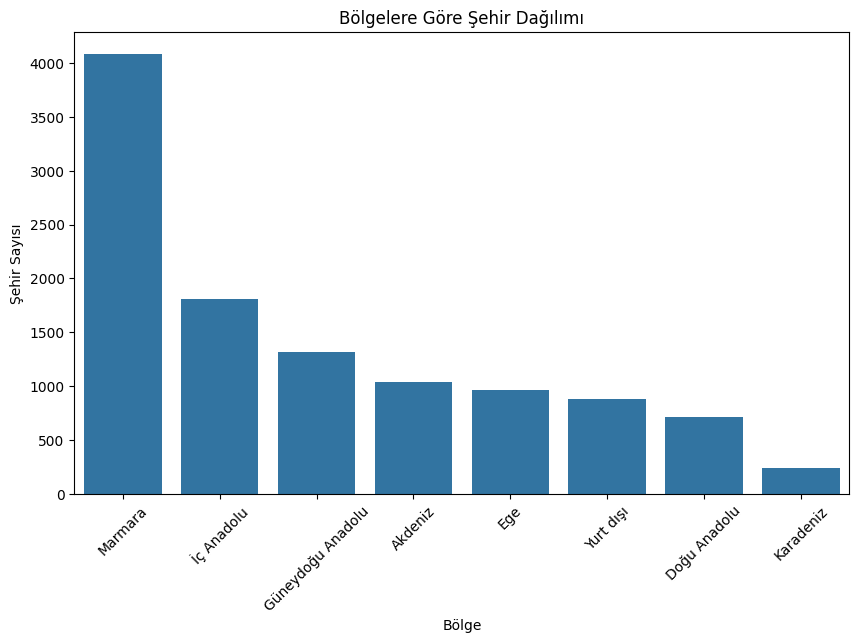

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bölge frekansları
region_counts = df['Ikametgah Bolgesi'].value_counts()

# Çubuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xlabel('Bölge')
plt.ylabel('Şehir Sayısı')
plt.title('Bölgelere Göre Şehir Dağılımı')
plt.xticks(rotation=45)
plt.show()

In [37]:
df['Ikametgah Bolgesi'] = df['Ikametgah Bolgesi'].replace({
    'Doğu Anadolu': 0,
    'Güneydoğu Anadolu': 0,
    'Yurt dışı': 0,
    'Akdeniz' : 1,
    'Karadeniz' : 1,
    'Ege' : 2,
    'Marmara': 2,
    'İç Anadolu' : 2
})

# Sonuçları görmek için
print(df['Ikametgah Bolgesi'].unique())


[0 2 1]


C:\Users\havva\AppData\Local\Temp\ipykernel_236\1605584249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ikametgah Bolgesi'] = df['Ikametgah Bolgesi'].replace({


In [38]:
df['Ikametgah Sehri'].unique()

array(['Amasya', 'Konya', 'İstanbul', 'Mardin', 'İzmir', 'Kırşehir',
       'Adıyaman', 'Bursa', 'Antalya', 'Ankara', 'Tekirdağ', 'Gaziantep',
       'Kütahya', 'Hakkari', 'Hatay', 'Tokat', 'Manisa', 'Osmaniye',
       'Giresun', 'Muğla', 'Erzurum', 'Kahramanmaraş', 'Batman',
       'Kayseri', 'Çanakkale', 'Adana', 'Malatya', 'Sivas', 'Şanlıurfa',
       'Diyarbakır', 'Tunceli', 'Rize', 'Mersin', 'Bingöl', 'Siirt',
       'Aksaray', 'Şırnak', 'Elazığ', 'Van', 'Aydın', 'Ağrı', 'Muş',
       'Çorum', 'Burdur', 'Kocaeli', 'Balıkesir', 'Samsun', 'Uşak',
       'Edirne', 'Ordu', 'Eskişehir', 'Kastamonu', 'Karabük', 'Kars',
       'Bitlis', 'Sakarya', 'Yurt dışı', 'Afyonkarahisar', 'Zonguldak',
       'Isparta', 'Trabzon', 'Niğde', 'Yalova', 'Artvin', 'Karaman',
       'Denizli', 'Bayburt', 'Erzincan', 'Bilecik', 'Çankırı', 'Kilis',
       'Ardahan', 'Nevşehir', 'Yozgat', 'Kktc', 'Bolu', 'Düzce', 'Iğdır',
       'Kırıkkale', 'Bartın', 'Gümüşhane', 'Sinop', 'Kırklareli'],
      dtype=object)

In [39]:
#Şehir isimleri ve kademe puanlarını içeren veri
city_to_kademe = {
    'Yurt dışı': 1, 'Kktc': 1, 'İstanbul': 1, 'Ankara': 1, 'İzmir': 1, 'Kocaeli': 1, 'Antalya': 1, 'Bursa': 1, 'Eskişehir': 1, 'Muğla': 1,
    'Tekirdağ': 1, 'Denizli': 2, 'Sakarya': 2, 'Yalova': 2, 'Bolu': 2, 'Konya': 2, 'Aydın': 2, 'Isparta': 2, 
    'Kayseri': 2, 'Kırklareli': 2, 'Bilecik': 2, 'Çanakkale': 2, 'Edirne': 2, 'Karabük': 2, 'Manisa': 2, 
    'Balıkesir': 2,'Düzce': 3, 'Mersin': 3, 'Trabzon': 3, 'Adana': 3, 'Zonguldak': 3, 'Uşak': 3, 'Gaziantep': 3, 
    'Samsun': 3, 'Burdur': 3, 'Kırıkkale': 3, 'Düzce': 3, 'Karaman': 3, 'Rize': 3, 'Kütahya': 3, 'Amasya': 4, 
    'Hatay': 4, 'Nevşehir': 4, 'Afyonkarahisar': 4, 'Elazığ': 4, 'Kırşehir': 4, 'Malatya': 4, 'Sivas': 4, 
    'Bartın': 4, 'Erzincan': 4, 'Kastamonu': 4, 'Artvin': 4, 'Çorum': 4, 'Aksaray': 4, 'Sinop': 5, 'Giresun': 5, 
    'Osmaniye': 5, 'Çankırı': 5, 'Tokat': 5, 'Niğde': 5, 'Kahramanmaraş': 5, 'Tunceli': 5, 'Ordu': 5, 'Erzurum': 5, 
    'Kilis': 5, 'Yozgat': 5, 'Gümüşhane': 5, 'Bayburt': 5, 'Adıyaman': 6, 'Ardahan': 6, 'Diyarbakır': 6, 
    'Kars': 6, 'Iğdır': 6, 'Bingöl': 6, 'Batman': 6, 'Şanlıurfa': 6, 'Mardin': 6, 'Siirt': 6, 'Bitlis': 6, 
    'Van': 6, 'Hakkari': 6, 'Muş': 6, 'Ağrı': 6, 'Şırnak': 6
}


# Şehir isimlerine göre kademe puanlarını 'Ikametgah Sehri' sütununa göre eşleştir
df['Ikametgah Sehri Kademe Puani'] = df['Ikametgah Sehri'].map(city_to_kademe)


In [40]:
df['Ikametgah Sehri Kademe Puani'].unique()

array([4, 2, 1, 6, 3, 5], dtype=int64)

## 'Universite Adi' sütunu

In [41]:
df['Universite Adi'].describe()

count                            11049
unique                             203
top       İstanbul Teknik Üniversitesi
freq                               322
Name: Universite Adi, dtype: object

In [42]:
df['Universite Adi'].unique()

array(['Munzur Üniversitesi', 'Hacettepe Üniversitesi',
       'Kapadokya Üniversitesi', 'Mardin Artuklu Üniversitesi',
       'Boğaziçi Üniversitesi', 'İzmir Yüksek Teknoloji Enstitüsü',
       'Kırşehir Ahi Evran Üniversitesi', 'Yıldız Teknik Üniversitesi',
       'Necmettin Erbakan Üniversitesi', 'Bursa Uludağ Üniversitesi',
       'MEF Üniversitesi', 'Eskişehir Teknik Üniversitesi',
       'İstanbul Üniversitesi-Cerrahpaşa', 'Gazi Üniversitesi',
       'Tekirdağ Namık Kemal Üniversitesi', 'Gaziantep Üniversitesi',
       'Koç Üniversitesi', 'Ankara Hacı Bayram Veli Üniversitesi',
       'Çukurova Üniversitesi', 'Kütahya Dumlupınar Üniversitesi',
       'Ankara Bilim Üniversitesi', 'Dicle Üniversitesi',
       'Dokuz Eylül Üniversitesi', 'Siirt Üniversitesi',
       'Kilis 7 Aralık Üniversitesi',
       'Çanakkale Onsekiz Mart Üniversitesi',
       'Sivas Cumhuriyet Üniversitesi',
       'Tokat Gaziosmanpaşa Üniversitesi', 'Nişantaşı Üniversitesi',
       'Özyeğin Üniversitesi', 'Ma

In [43]:
# 'Universite Adi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Adi'].isna().sum()
nan_count

0

In [44]:
# Universite Adi sütunundaki değerlerin baş harflerini büyük yapma
df['Universite Adi'] = df['Universite Adi'].str.strip().str.title()

# Değişiklikleri kontrol etme
print(df['Universite Adi'].value_counts())

Universite Adi
İstanbul Teknik Üniversitesi                   322
Yıldız Teknik Üniversitesi                     316
Marmara Üniversitesi                           305
Boğaziçi Üniversitesi                          277
İstanbul Üniversitesi                          259
                                              ... 
İzmir Tınaztepe Üniversitesi                     2
İzmir Kavram Meslek Yüksekokulu                  2
Yüksek İhtisas Üniversitesi                      2
Milli Savunma Üniversitesi (Askerî)              1
Ankara Müzik Ve Güzel Sanatlar Üniversitesi      1
Name: count, Length: 203, dtype: int64


In [45]:
import pandas as pd

# Üniversiteleri ve puanlarını içeren veri çerçevesi
data = {
    'Koç Üniversitesi': 1126.41,
    'Hacettepe Üniversitesi': 1072.82,
    'Orta Doğu Teknik Üniversitesi (ODTÜ)': 1060.65,
    'Ankara Üniversitesi': 1032.49,
    'İstanbul Teknik Üniversitesi (İTÜ)': 1032,
    'İstanbul Üniversitesi': 1029.22,
    'Sabancı Üniversitesi': 996.84,
    'Gazi Üniversitesi': 981.81,
    'Ege Üniversitesi': 978.84,
    'İstanbul Üniversitesi-Cerrahpaşa': 954.44,
    'İhsan Doğramacı Bilkent Üniversitesi': 922.39,
    'Gebze Teknik Üniversitesi': 917.82,
    'Marmara Üniversitesi': 914.39,
    'Yıldız Teknik Üniversitesi': 909.98,
    'Erciyes Üniversitesi': 909.8,
    'Atatürk Üniversitesi': 884.68,
    'Boğaziçi Üniversitesi': 878.9,
    'Dokuz Eylül Üniversitesi': 873.09,
    'Fırat Üniversitesi': 870.13,
    'Çukurova Üniversitesi': 864.64,
    'İzmir Yüksek Teknoloji Enstitüsü': 862.47,
    'Karadeniz Teknik Üniversitesi': 859.04,
    'Selçuk Üniversitesi': 853.78,
    'Akdeniz Üniversitesi': 848.62,
    'Acıbadem Mehmet Ali Aydınlar Üniversitesi': 842.03,
    '19 Mayıs Üniversitesi': 824.76,
    'Bursa Uludağ Üniversitesi': 820.19,
    'Bezm-i Alem Vakıf Üniversitesi': 810.85,
    'Sağlık Bilimleri Üniversitesi': 803.83,
    'Eskişehir Osmangazi Üniversitesi': 797.22,
    'Sakarya Üniversitesi': 796.6,
    'İnönü Üniversitesi': 787.25,
    'Çankaya Üniversitesi': 777.56,
    'Kocaeli Üniversitesi': 774.61,
    'İzmir Kâtip Çelebi Üniversitesi': 772.83,
    'Süleyman Demirel Üniversitesi': 765.18,
    'Ankara Yıldırım Beyazıt Üniversitesi': 764.22,
    'İstanbul Medeniyet Üniversitesi': 758.05,
    'Van 100. Yıl Üniversitesi': 753.5,
    'İstanbul Medipol Üniversitesi': 749,
    'Gaziantep Üniversitesi': 735.49,
    'Necmettin Erbakan Üniversitesi': 734.68,
    'Mersin Üniversitesi': 729.85,
    'Anadolu Üniversitesi': 717.56,
    'Yeditepe Üniversitesi': 712.49,
    'Bolu Abant İzzet Baysal Üniversitesi': 712.39,
    'Eskişehir Teknik Üniversitesi': 711.33,
    'Pamukkale Üniversitesi': 706.47,
    'TOBB Ekonomi ve Teknoloji Üniversitesi': 705.53,
    'Abdullah Gül Üniversitesi': 705.46,
    'Manisa Celal Bayar Üniversitesi': 705.14,
    'Recep Tayyip Erdoğan Üniversitesi': 704.41,
    'Başkent Üniversitesi': 704.3,
    'Sivas Cumhuriyet Üniversitesi': 703.88,
    'Harran Üniversitesi': 701.92,
    'Düzce Üniversitesi': 697.74,
    'İstinye Üniversitesi': 692.18,
    'Muğla Sıtkı Koçman Üniversitesi': 687.61,
    'Aydın Adnan Menderes Üniversitesi': 686.89,
    'Karabük Üniversitesi': 686.39,
    'Çanakkale 18 Mart Üniversitesi': 683.79,
    'Konya Teknik Üniversitesi': 680.57,
    'Özyeğin Üniversitesi': 680.1,
    'Bahçeşehir Üniversitesi': 677.08,
    'Kadir Has Üniversitesi': 676.69,
    'Bingöl Üniversitesi': 675.71,
    'Niğde Ömer Halisdemir Üniversitesi': 670.63,
    'Kahramanmaraş Sütçü İmam Üniversitesi': 655.17,
    'Atılım Üniversitesi': 655.1,
    'Afyon Kocatepe Üniversitesi': 647.61,
    'Tekirdağ Namık Kemal Üniversitesi': 641.72,
    'Karamanoğlu Mehmetbey Üniversitesi': 641.5,
    'Bursa Teknik Üniversitesi': 640.67,
    'Trakya Üniversitesi': 640.36,
    'Adana Alparslan Türkeş Bilim ve Teknoloji Üniversitesi': 638.17,
    'Bartın Üniversitesi': 636.11,
    'Aksaray Üniversitesi': 627.82,
    'Hasan Kalyoncu Üniversitesi': 624.72,
    'Kırıkkale Üniversitesi': 623.39,
    'Hitit Üniversitesi': 623.12,
    'Kastamonu Üniversitesi': 621.34,
    'Erzurum Teknik Üniversitesi': 617.99,
    'Biruni Üniversitesi': 616.5,
    'Tokat Gaziosmanpaşa Üniversitesi': 612.38,
    'Isparta Uygulamalı Bilimler Üniversitesi': 611.96,
    'İskenderun Teknik Üniversitesi': 609.5,
    'Ordu Üniversitesi': 608.12,
    'Zonguldak Bülent Ecevit Üniversitesi': 608.01,
    'Yozgat Bozok Üniversitesi': 605.59,
    'Erzincan Binali Yıldırım Üniversitesi': 603.56,
    'Hatay Mustafa Kemal Üniversitesi': 599.34,
    'Dicle Üniversitesi': 598.11,
    'Burdur Mehmet Akif Ersoy Üniversitesi': 593.42,
    'Balıkesir Üniversitesi': 592.32,
    'Adıyaman Üniversitesi': 591.91,
    'Çankırı Karatekin Üniversitesi': 590.09,
    'Siirt Üniversitesi': 588.55,
    'İzmir Ekonomi Üniversitesi': 586.99,
    'Yaşar Üniversitesi': 586.97,
    'Kırşehir Ahi Evran Üniversitesi': 582.78,
    'Bilecik Şey Edebali Üniversitesi': 581.46,
    'Uşak Üniversitesi': 580.2,
    'Munzur Üniversitesi': 576.21,
    'Giresun Üniversitesi': 575.71,
    'Tarsus Üniversitesi': 570.58,
    'Konya Gıda ve Tarım Üniversitesi': 567.86,
    'Osmaniye Korkut Ata Üniversitesi': 566.55,
    'Iğdır Üniversitesi': 564.73,
    'Nevşehir Hacı Bektaş Veli Üniversitesi': 563.48,
    'Kafkas Üniversitesi': 561.56,
    'Bayburt Üniversitesi': 560.38,
    'Sinop Üniversitesi': 558.43,
    'İstanbul Bilgi Üniversitesi': 555.51,
    'Altınbaş Üniversitesi': 553.21,
    'İstanbul Sabahattin Zaim Üniversitesi': 550.87,
    'Yalova Üniversitesi': 548.12,
    'Artvin Çoruh Üniversitesi': 545.31,
    'Sakarya Uygulamalı Bilimler Üniversitesi': 543.64,
    'Galatasaray Üniversitesi': 542.42,
    'TED Üniversitesi': 537.66,
    'Kütahya Dumlupınar Üniversitesi': 536.89,
    'Antalya Bilim Üniversitesi': 535.34,
    'İbn Haldun Üniversitesi': 532.89,
    'İstanbul Ticaret Üniversitesi': 530.23,
    'Ardahan Üniversitesi': 526.72,
    'Malatya Turgut Özal Üniversitesi': 523.14,
    'İstanbul Arel Üniversitesi': 520.67,
    'İstanbul Okan Üniversitesi': 518.34,
    'İstanbul Aydın Üniversitesi': 515.02,
    'Gümüşhane Üniversitesi': 510.78,
    'Ağrı İbrahim Çeçen Üniversitesi': 508.56,
    'İstanbul Gelişim Üniversitesi': 506.45,
    'Demiroğlu Bilim Üniversitesi': 504.31,
    'Amasya Üniversitesi': 503.22,
    'Muş Alparslan Üniversitesi': 501.19,
    'Üsküdar Üniversitesi': 500.11,
    'Alanya Alaaddin Keykubat Üniversitesi': 498.02,
    'Piri Reis Üniversitesi': 496.54,
    'KTO Karatay Üniversitesi': 494.89,
    'Bitlis Eren Üniversitesi Yüksek İhtisas Üniversitesi': 493.72,
    'Kütahya Sağlık Bilimleri Üniversitesi': 492.87,
    'Çorum Hitit Üniversitesi': 491.99,
    'Uşak Üniversitesi Sosyal Bilimler Enstitüsü': 489.56,
    'Batman Üniversitesi': 487.71,
    'T.C. Malatya Turgut Özal Üniversitesi': 485.67,
    'Kocaeli Üniversitesi Sağlık Bilimleri Fakültesi': 484.32,
    'Burdur Mehmet Akif Ersoy Üniversitesi Yüksek Lisans Programı': 482.89,
    'Üsküdar Üniversitesi Lisans Programı': 480.98,
    'Gümüşhane Üniversitesi Lisans Programı': 478.67,
    'Ege Üniversitesi Lisans Programı': 476.45,
    'İzmir Yüksek Teknoloji Enstitüsü Lisans Programı': 474.12
}

# Puan aralıklarını ve etiketlerini tanımlama
bins = [0, 599, 699, 799, 899, 999, float('inf')]
labels = [1, 2, 3, 4, 5, 6]  # Gruplama için numaralar

# Üniversiteleri puanlarına göre gruplama
uni_to_group = {uni: pd.cut([score], bins=bins, labels=labels, right=False)[0] for uni, score in data.items()}


# 'uni grup' sütununu ekleme ve grup numaralarını atama
df['Uni Grup'] = df['Universite Adi'].map(uni_to_group)


In [46]:
df['Uni Grup'].unique()

array([ 1.,  6., nan,  4.,  5.,  3.,  2.])

In [47]:
# Diğer üniler için değerler 0 ile doldurulur
df['Uni Grup'] = df['Uni Grup'].fillna(0)

## 'Universite Turu' sütunu

* Eksik veriler temizlenmiştir.
* Verilerin yazılış formatı düzenlenmiştir.
* One-hot encoding yöntemi ile string değerler inte çevrilmiş ve 0-1 olarak düzenlenmiştir.

KORELASYONA TEKRAR BAK

In [48]:
df['Universite Turu'].describe()

count      11049
unique         2
top       Devlet
freq        9215
Name: Universite Turu, dtype: object

In [49]:
df['Universite Turu'].unique()

array(['Devlet', 'Özel'], dtype=object)

In [50]:
# 'Universite Turu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Turu'].isna().sum()
nan_count

0

In [51]:
# 'Universite Turu' sütunundaki 'Özel' ve 'Devlet' değerlerini 0 ve 1'e dönüştürülür
df['Universite Turu'] = df['Universite Turu'].map({'Özel': 1, 'Devlet': 0})

In [52]:
df['Universite Turu'].describe

<bound method NDFrame.describe of 0        0
1        0
2        1
3        0
4        0
        ..
11044    0
11045    0
11046    0
11047    0
11048    0
Name: Universite Turu, Length: 11049, dtype: int64>

## 'Burslu ise Burs Yuzdesi' sütunu

* Eksik değerler burs alınmadığı düşünülerek 0 ile dolduruldu. 
* Sonrasında gruplama yöntemi ile ('76-100': 4, '51-75': 3, '26-50': 2, '10-25': 1, '0-9': 0) şeklinde gruplandırılarak yeni oluşturulan sütuna (Burs Yuzdesi Grubu) eklendi.


In [53]:
df['Burslu ise Burs Yuzdesi'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Burslu ise Burs Yuzdesi, dtype: float64

In [54]:
df['Burslu ise Burs Yuzdesi'].unique()

array([nan])

In [55]:
# 'Burslu ise Burs Yuzdesi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Burslu ise Burs Yuzdesi'].isna().sum()
nan_count

11049

In [56]:
# Eksik değerler 0 ile doldurulur
df['Burslu ise Burs Yuzdesi'] = df['Burslu ise Burs Yuzdesi'].fillna(0)

In [57]:
df['Burs Yuzdesi Grubu'] = pd.cut(df['Burslu ise Burs Yuzdesi'], 
                                  bins=[-0.1, 0, 25, 50, 75, 100], 
                                  labels=['0-9', '10-25', '26-50', '51-75', '76-100'])


In [58]:
print(df[['Burslu ise Burs Yuzdesi', 'Burs Yuzdesi Grubu']])

       Burslu ise Burs Yuzdesi Burs Yuzdesi Grubu
0                          0.0                0-9
1                          0.0                0-9
2                          0.0                0-9
3                          0.0                0-9
4                          0.0                0-9
...                        ...                ...
11044                      0.0                0-9
11045                      0.0                0-9
11046                      0.0                0-9
11047                      0.0                0-9
11048                      0.0                0-9

[11049 rows x 2 columns]


In [59]:
# 'Burs Yuzdesi Grubu' sütunundaki 'Özel' ve 'Devlet' değerlerini 0 ve 1'e dönüştürülür
df['Burs Yuzdesi Grubu'] = df['Burs Yuzdesi Grubu'].map({'76-100': 4, '51-75': 3, '26-50': 2, '10-25': 1, '0-9': 0})

In [60]:
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari = df["Burs Yuzdesi Grubu"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari.to_string())

Burs Yuzdesi Grubu
0    11049
1        0
2        0
3        0
4        0


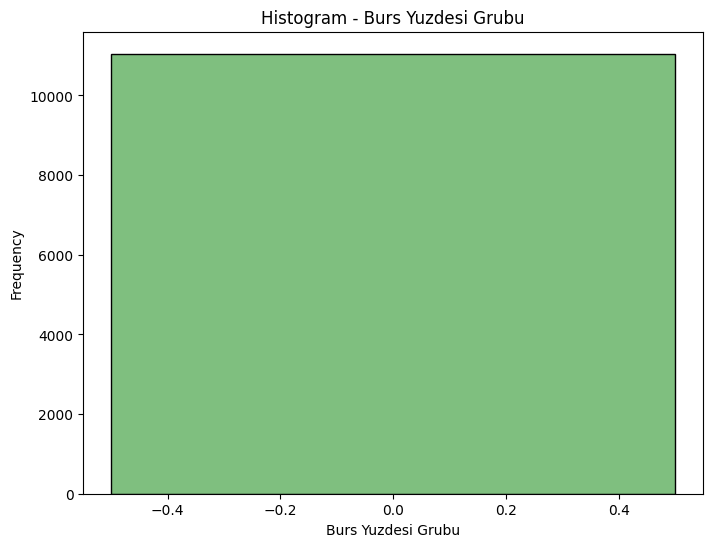

In [61]:
his_grap(df, 'Burs Yuzdesi Grubu')

In [62]:
df['Burs Yuzdesi Grubu'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True, categories_dtype=int64)

## 'Burs Aliyor mu?' sütunu

* Verilerin yazılış formatı düzenlenmiştir.
* One-hot encoding yöntemi ile string değerler inte çevrilmiş ve 0-1 olarak düzenlenmiştir.

In [63]:
df['Burs Aliyor mu?'].describe()

count     11049
unique        2
top       Hayır
freq       9400
Name: Burs Aliyor mu?, dtype: object

In [64]:
df['Burs Aliyor mu?'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [65]:
# Burs Aliyor mu? sütunundaki değerlerin baş harflerini büyük yapma
df['Burs Aliyor mu?'] = df['Burs Aliyor mu?'].str.strip().str.title()

# Değişiklikleri kontrol etme
print(df['Burs Aliyor mu?'].value_counts())

Burs Aliyor mu?
Hayır    9400
Evet     1649
Name: count, dtype: int64


In [66]:
# 'Burs Aliyor mu?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
# Eğer "Burs Aliyor mu?" sütunu sayısal değilse, önce sayısala çevirilir
df['Burs Aliyor mu?'] = df['Burs Aliyor mu?'].map({'Evet': 1, 'Hayır': 0})

## 'Bölüm' sütunu

* Şimdilik kalacak, çok da önemli değil.
* Üniversite mezuniyet ortalaması ile bölüm ilişkisini chatgptye soralım. 

In [67]:
df['Bölüm'].describe()

count                       11049
unique                        349
top       Bilgisayar Mühendisliği
freq                          817
Name: Bölüm, dtype: object

In [68]:
df['Bölüm'].unique()

array(['Sosyal Hizmet', 'Uluslararası İlişkiler', 'Diğer',
       'İslami İlimler', 'İşletme', 'Bilgisayar Mühendisliği',
       'Hemşirelik', 'Çocuk Gelişimi', 'İlahiyat', 'Almanca Öğretmenliği',
       'İlköğretim Matematik Öğretmenliği',
       'Metalurji ve Malzeme Mühendisliği', 'Endüstri Mühendisliği',
       'Bitki Koruma', 'Hukuk', 'Matematik', 'İktisat',
       'Elektrik-Elektronik Mühendisliği', 'Tıp', 'Psikoloji',
       'Hemşirelik ve Sağlık Hizmetleri', 'Özel Eğitim Öğretmenliği',
       'Biyomühendislik', 'Beden Eğitimi ve Spor Öğretmenliği',
       'Rehberlik ve Psikolojik Danışmanlık', 'Okul Öncesi Öğretmenliği',
       'Hidrojeoloji Mühendisliği', 'Bilişim Sistemleri Mühendisliği',
       'Moleküler Biyoloji ve Genetik',
       'Bilgisayar Bilimi ve Mühendisliği', 'Yazılım Mühendisliği',
       'İnşaat Mühendisliği', 'Sosyoloji', 'Diş Hekimliği',
       'Beslenme ve Diyetetik', 'Uçak Mühendisliği', 'Eczacılık',
       'İngiliz Dili ve Edebiyatı',
       'Elektronik ve 

In [69]:
unique_list = df["Bölüm"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/bolum_test.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

#'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['g_temp'] = df["Bölüm"].fillna('Hayır')

#Verileri temizleme ve kümeleme
sentences = df['g_temp'].unique()  # Unique değerleri alma

#'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

#Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

#Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

#Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'g': sentences_cleaned,
    'Bölüm Grup': kmeans.labels_
})

#Orijinal DataFrame'e küme etiketlerini ekleme
# 'Hayır' olan değerler için 'NaN' olarak işaretleme
df['Bölüm Grup'] = df['g_temp'].map(df_clusters.set_index('g')['Bölüm Grup']).fillna('5.0')

#Geçici sütunu kaldırma
df.drop(columns=['g_temp'], inplace=True)

#DataFrame'i yazdırma
print(df.head())
df['Bölüm'].value_counts()

   Basvuru Yili Cinsiyet  Dogum Tarihi Dogum Yeri Ikametgah Sehri  \
0          2023    Kadın          2002     Amasya          Amasya   
1          2023    Kadın          2004      Konya           Konya   
2          2023    Erkek          2002   İstanbul        İstanbul   
3          2023    Erkek          2003     Mardin          Mardin   
4          2023    Erkek          2002     Samsun        İstanbul   

                Universite Adi  Universite Turu  Burslu ise Burs Yuzdesi  \
0          Munzur Üniversitesi                0                      0.0   
1       Hacettepe Üniversitesi                0                      0.0   
2       Kapadokya Üniversitesi                1                      0.0   
3  Mardin Artuklu Üniversitesi                0                      0.0   
4        Boğaziçi Üniversitesi                0                      0.0   

   Burs Aliyor mu?                   Bölüm  ... Ingilizce Biliyor musunuz?  \
0                0           Sosyal Hizmet  ...   

Bölüm
Bilgisayar Mühendisliği               817
Endüstri Mühendisliği                 635
Tıp                                   456
İşletme                               425
Hukuk                                 383
                                     ... 
Japonca Öğretmenliği                    1
İstatistik ve Bilgisayar Bilimleri      1
Film Tasarımı ve Yazarlığı              1
İşletme Bilgi Yönetimi                  1
İspanyol Dili ve Edebiyatı              1
Name: count, Length: 349, dtype: int64

In [71]:
#'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['Bölüm Grup'] = pd.to_numeric(df['Bölüm Grup'], errors='coerce')

#Veri türlerini kontrol etme
print(df.dtypes)

#NaN değerlerin olup olmadığını kontrol etme
print(df['Bölüm Grup'].isna().sum())


Basvuru Yili                                                    int64
Cinsiyet                                                       object
Dogum Tarihi                                                    int32
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                       object
Universite Not Ortalamasi                                      object
Daha Once Baska Bir Universiteden Mezun Olmus                 float64
Lise Adi                                                       object
Lise Adi Diger      

In [72]:
#Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 2:
 - Sosyal Hizmet
 - Diğer
 - İslami İlimler
 - Hemşirelik
 - Çocuk Gelişimi
 - İlahiyat
 - Almanca Öğretmenliği
 - İlköğretim Matematik Öğretmenliği
 - Bitki Koruma
 - Hukuk
 - Matematik
 - İktisat
 - Tıp
 - Psikoloji
 - Özel Eğitim Öğretmenliği
 - Biyomühendislik
 - Beden Eğitimi ve Spor Öğretmenliği
 - Okul Öncesi Öğretmenliği
 - Sosyoloji
 - Diş Hekimliği
 - Eczacılık
 - İngiliz Dili ve Edebiyatı
 - Türk Dili ve Edebiyatı
 - Müzik Öğretmenliği
 - Türk Dili ve Edebiyatı Öğretmenliği
 - Yönetim Bilimleri
 - Endüstriyel Tasarım
 - Fen Bilgisi Öğretmenliği
 - Sosyal Bilgiler Öğretmenliği
 - Ebelik
 - Muhasebe
 - Spor Yöneticiliği
 - Yönetim Bilişim Sistemleri
 - Antrenörlük Eğitimi
 - Dijital Oyun Tasarımı
 - Odyoloji
 - İngilizce Öğretmenliği
 - Kimya
 - Pazarlama
 - Fizik
 - Turizm İşletmeciliği
 - Kimya Öğretmenliği
 - Ekonomi
 - Biyoloji
 - Tarih
 - Siyaset Bilimi
 - Sanat Tarihi
 - Görsel Sanatlar Öğretmenliği
 - Görsel İletişim Tasarımı
 - İletişim Sanatları
 - Müzikolo

In [73]:
df['Bölüm Grup'].dtypes

dtype('int32')

In [74]:
df['Bölüm Grup'] = df['Bölüm Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler

## 'Universite Kacinci Sinif' sütunu 

* Eksik veriler silindi.
* Universite Kacinci Sinif Göre Ortalama Değerlendirme Puanları Grafiği kontrol edilerek bir gruplandırma işlemi ile veriler sayısallaştırıldı.

In [75]:
df['Universite Kacinci Sinif'].describe()

count     11049
unique        7
top           2
freq       3315
Name: Universite Kacinci Sinif, dtype: object

In [76]:
df['Universite Kacinci Sinif'].unique()

array(['1', '3', '2', '4', 'Hazırlık', '5', '6'], dtype=object)

In [77]:
# 'Universite Kacinci Sinif' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Kacinci Sinif'].isna().sum()
nan_count

0

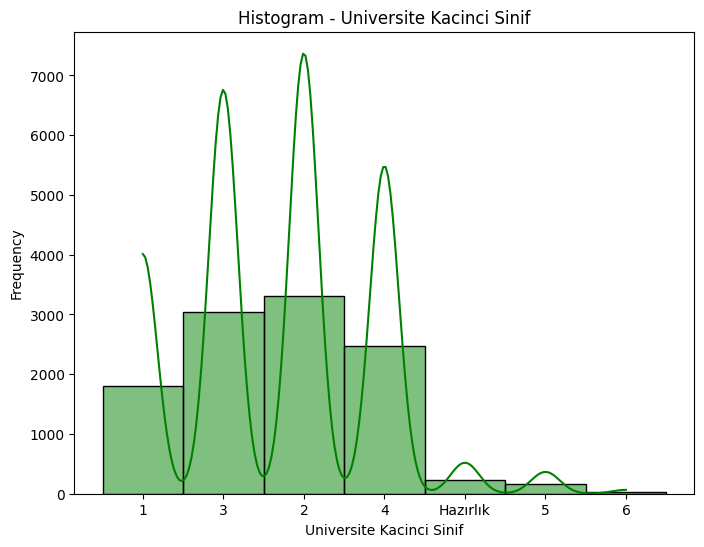

In [78]:
his_grap(df, 'Universite Kacinci Sinif')

In [79]:
# Kategorileri gruplandır ve sayısallaştır
df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].replace({
    'Hazırlık': 0,
    '1': 0,
    '2': 0,
    '3': 2,
    '4': 2,
    '5': 2,
    '6': 1,
    'Mezun': 0,
    'Yüksek Lisans' : 1
})

# Sonuçları görmek için
print(df['Universite Kacinci Sinif'].head())


0    0
1    0
2    0
3    0
4    2
Name: Universite Kacinci Sinif, dtype: int64


C:\Users\havva\AppData\Local\Temp\ipykernel_236\2426019414.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].replace({


In [80]:
df['Universite Kacinci Sinif'].unique()

array([0, 2, 1], dtype=int64)

## 'Universite Not Ortalamasi' sütunu

* Eksik değerler ve 'Ortalama bulunmuyor', 'Hazırlığım', 'Not ortalaması yok', 'ORTALAMA BULUNMUYOR'; 'Bilinmiyor' olarak eklendi.
* Aralıklı değerlerin ortalaması alınarak yeni değerler elde edildi. 
* Universite Not Ortalamasi Göre Ortalama Değerlendirme Puanları grafiğine bakılarak gruplandırma ile sayısallaştırma işlemi yapıldı.

In [81]:
df['Universite Not Ortalamasi'].describe()

count           11049
unique              6
top       2.50 - 2.99
freq             3605
Name: Universite Not Ortalamasi, dtype: object

In [82]:
df['Universite Not Ortalamasi'].unique()

array(['2.50 - 2.99', 'Hazırlığım', '3.00 - 3.49', '1.80 - 2.49',
       '3.50 - 4.00', '0 - 1.79'], dtype=object)

In [83]:
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Universite Not Ortalamasi"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Universite Not Ortalamasi
2.50 - 2.99    3605
3.00 - 3.49    3296
1.80 - 2.49    1742
Hazırlığım     1108
3.50 - 4.00    1007
0 - 1.79        291


In [84]:
# 'Universite Not Ortalamasi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Universite Not Ortalamasi'].isna().sum()
nan_count

0

In [85]:
import numpy as np

# Not ortalaması aralıklarına göre gruplama fonksiyonu
def not_ortalama_gruplama(value):
    # Bilinmeyen değerler
    if value in ['Ortalama bulunmuyor', 'Hazırlığım', 'Not ortalaması yok', 'ORTALAMA BULUNMUYOR']:
        return 'Bilinmiyor'
    
    # Sayısal aralıklar için
    if '-' in value:
        # Aralıkları temizle ve ortalamasını al
        aralik = value.replace(' ', '').replace('vealtı', '-').replace('ve altı', '-')
        aralik = aralik.split('-')
        try:
            # Ortalamayı al
            ortalama = (float(aralik[0]) + float(aralik[1])) / 2
            return str(ortalama)
        except:
            return 'Bilinmiyor'
    
    # print(value)
    return str(value)  # Diğer durumlar için kendisini döndürür döndür

# Yeni sütunu oluştur ve gruplama işlemini uygula
df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].apply(not_ortalama_gruplama)

# Sonuçları görmek için
print(df['Universite Not Ortalamasi'].head(10))


0         2.745
1    Bilinmiyor
2    Bilinmiyor
3    Bilinmiyor
4         3.245
5         2.745
6         2.745
7    Bilinmiyor
8         3.245
9    Bilinmiyor
Name: Universite Not Ortalamasi, dtype: object


In [86]:
df['Universite Not Ortalamasi'].dtypes
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Universite Not Ortalamasi"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Universite Not Ortalamasi
2.745         3605
3.245         3296
2.145         1742
Bilinmiyor    1108
3.75          1007
0.895          291


In [87]:
# Kategorileri gruplandır ve sayısallaştır
df['Universite Not Ortalamasi'] = df['Universite Kacinci Sinif'].replace({
    '2.75' : 1,
    '3.25' : 1,
    '2.50 ve altı' : 1,
    'Bilinmiyor' : 0, 
    '3.75' : 2,
    '2.745' : 1,
    '3.245' : 1,
    '2.25' : 1,
    '3.5' : 2,
    '2.145' : 0,
    '1.75' : 0,
    '0.895' : 0,
})

# Sonuçları görmek için
print(df['Universite Not Ortalamasi'].head())


0    0
1    0
2    0
3    0
4    2
Name: Universite Not Ortalamasi, dtype: int64


## 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunu

* Eksik değerler 'Hayır' ile dolduruldu.
* One-hot encoding ile 0-1 olarak sayısallaştırma yapıldı.


In [88]:
df['Daha Once Baska Bir Universiteden Mezun Olmus'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Daha Once Baska Bir Universiteden Mezun Olmus, dtype: float64

In [89]:
df['Daha Once Baska Bir Universiteden Mezun Olmus'].unique()

array([nan])

In [90]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Daha Once Baska Bir Universiteden Mezun Olmus'].isna().sum()
nan_count

11049

In [91]:
# Eksik değerler 'Hayır' ile doldurulur
df['Daha Once Baska Bir Universiteden Mezun Olmus'] = df['Daha Once Baska Bir Universiteden Mezun Olmus'].fillna('Hayır')

In [92]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Daha Once Baska Bir Universiteden Mezun Olmus'] = df['Daha Once Baska Bir Universiteden Mezun Olmus'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\315629819.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Daha Once Baska Bir Universiteden Mezun Olmus'] = df['Daha Once Baska Bir Universiteden Mezun Olmus'].replace({'Hayır': 0, 'Evet': 1})


## 'Lise Adi' sütunu                                          

In [93]:
df['Lise Adi'].describe()

count                   11049
unique                   7830
top       Açık Öğretim Lisesi
freq                       70
Name: Lise Adi, dtype: object

## 'Lise Adi Diger' sütunu 

In [94]:
df['Lise Adi Diger'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Lise Adi Diger, dtype: float64

## 'Lise Sehir' sütunu 

In [95]:
df['Lise Sehir'].describe()

count        11049
unique          83
top       İstanbul
freq          1998
Name: Lise Sehir, dtype: object

## 'Lise Turu' sütunu 

In [96]:
df['Lise Turu'].describe()

count      11049
unique         2
top       Devlet
freq        9242
Name: Lise Turu, dtype: object

In [97]:
df['Lise Turu'].unique()

array(['Devlet', 'Özel'], dtype=object)

In [98]:
df['Lise Turu'].unique()

array(['Devlet', 'Özel'], dtype=object)

In [99]:
# 'Lise Turu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Lise Turu'].isna().sum()
nan_count

0

In [100]:
# Eksik değerler 'Devlet olarak doldurulur 
df['Lise Turu'] = df['Lise Turu'].fillna('Devlet')

In [101]:
df['Lise Turu'] = df['Lise Turu'].replace({
    'Anadolu lisesi': 'Devlet', 
    'Fen lisesi': 'Devlet', 
    'Özel lisesi': 'Özel', 
    'Düz lise': 'Devlet',
    'Meslek lisesi': 'Devlet', 
    'İmam Hatip Lisesi': 'Devlet', 
    'Meslek Lisesi': 'Devlet',
    'Fen Lisesi': 'Devlet', 
    'Düz Lise': 'Devlet', 
    'Anadolu Lisesi': 'Devlet', 
    'Özel Lise': 'Özel',
    'Özel Lisesi': 'Özel', 
    'Diğer': 'Diğer', 
    'Özel': 'Özel', 
    'Meslek': 'Devlet', 
    'Devlet': 'Devlet'
})

# Sonuçları görmek için
print(df['Lise Turu'].unique())

['Devlet' 'Özel']


In [102]:
# 'Lise Turu' sütunundaki 'Diğer', 'Devlet' ve 'Özel' değerlerini 0, 1 ve 2'ye dönüştürülür
df['Lise Turu'] = df['Lise Turu'].replace({'Diğer': 0, 'Devlet': 1, 'Özel': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\1753308976.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lise Turu'] = df['Lise Turu'].replace({'Diğer': 0, 'Devlet': 1, 'Özel': 2})


## 'Lise Bolumu' sütunu 

In [103]:
df['Lise Bolumu'].describe()

count       11049
unique          4
top       Sayısal
freq         6354
Name: Lise Bolumu, dtype: object

## 'Lise Bolum Diger' sütunu 

In [104]:
df['Lise Bolum Diger'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Lise Bolum Diger, dtype: float64

## 'Lise Mezuniyet Notu' sütunu

* Eksik veriler 'Bilinmiyor' değeri ile dolduruldu.
* Aralıklı değerlerin ortalaması alınarak yeni değerler elde edilerek gruplandırma işlemi yapıldı.

In [105]:
df['Lise Mezuniyet Notu'].describe()

count        11049
unique           3
top       75 - 100
freq          9742
Name: Lise Mezuniyet Notu, dtype: object

In [106]:
df['Lise Mezuniyet Notu'].unique()

array(['50 - 74', '75 - 100', '25 - 49'], dtype=object)

In [107]:
# 'Lise Mezuniyet Notu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Lise Mezuniyet Notu'].isna().sum()
nan_count

0

In [108]:
# Eksik değerler 'Bilinmiyor' ile doldurulur
df['Lise Mezuniyet Notu'] = df['Lise Mezuniyet Notu'].fillna('Bilinmiyor')

In [109]:
# Kategorileri gruplandır ve sayısallaştır
df['Lise Mezuniyet Notu Grup'] = df['Lise Mezuniyet Notu'].replace({
    '0 - 24': 0, 
    '25 - 49': 0, 
    '50 - 74': 0, 
    '75 - 100': 0, 
    'Bilinmiyor': 1
})

# Sonuçları görmek için
print(df['Lise Mezuniyet Notu Grup'].head())

0    0
1    0
2    0
3    0
4    0
Name: Lise Mezuniyet Notu Grup, dtype: int64


C:\Users\havva\AppData\Local\Temp\ipykernel_236\1690350015.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lise Mezuniyet Notu Grup'] = df['Lise Mezuniyet Notu'].replace({


## 'Baska Bir Kurumdan Burs Aliyor mu?' sütunu

In [110]:
df['Baska Bir Kurumdan Burs Aliyor mu?'].describe()

count     11049
unique        2
top       Hayır
freq       6658
Name: Baska Bir Kurumdan Burs Aliyor mu?, dtype: object

In [111]:
df['Baska Bir Kurumdan Burs Aliyor mu?'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [112]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baska Bir Kurumdan Burs Aliyor mu?'].isna().sum()
nan_count

0

In [113]:
# 'Daha Once Baska Bir Universiteden Mezun Olmus' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\467121160.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].replace({'Hayır': 0, 'Evet': 1})


## 'Burs Aldigi Baska Kurum' sütunu

In [114]:
df['Burs Aldigi Baska Kurum'].describe()

count     11049
unique     1196
top           -
freq       6524
Name: Burs Aldigi Baska Kurum, dtype: object

## 'Baska Kurumdan Aldigi Burs Miktari' sütunu 

In [115]:
df['Baska Kurumdan Aldigi Burs Miktari'].describe()

count     11049
unique        4
top           -
freq       6546
Name: Baska Kurumdan Aldigi Burs Miktari, dtype: object

In [116]:
df['Baska Kurumdan Aldigi Burs Miktari'].unique()

array(['-', '1000₺ ve üstü', '500₺ - 999₺', '0 - 499 ₺'], dtype=object)

In [117]:
unique_list = df['Baska Kurumdan Aldigi Burs Miktari'].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/burs_miktari.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [118]:
def process_amount(value):
    value = str(value)
    # 'kyk' kelimesi geçiyorsa 450 yaz
    if 'kyk' in value.lower():
        return 450
    
    # 'ay' kelimesi içeriyorsa ve birden fazla sayı içeriyorsa 3 haneli sayıları al
    if 'ay' in value.lower():
        numbers = re.findall(r'\d+', value)
        three_digit_numbers = [int(num) for num in numbers if 100 <= int(num) <= 999]
        if three_digit_numbers:
            return max(three_digit_numbers)  # En yüksek 3 haneli sayıyı al
    
    
    # 2 sayısal değer var ise onları topla, tek haneli rakamları işleme sokma
    numbers = re.findall(r'\d+', value)
    numbers = [int(num) for num in numbers if int(num) >= 10]
    if len(numbers) == 2:
        return sum(numbers)
    
    # Aralıklı değer içeriyorsa ortalamasını al
    range_match = re.search(r'(\d+)-(\d+)', value)
    if range_match:
        start = int(range_match.group(1))
        end = int(range_match.group(2))
        return (start + end) / 2
    
    # Sayısal değer içermiyorsa '-' koy
    if any(char.isdigit() for char in value):
        numbers = re.findall(r'\d+', value)
        numbers = [int(num) for num in numbers if int(num) >= 10]
        if numbers:
            return max(numbers)  # En yüksek sayıyı al
    
    # Diğer durumlar için '-'
    return '0'


In [119]:
# Fonksiyonu uygulayarak işlemleri gerçekleştir
df['Baska Kurumdan Aldigi Burs Miktari tl'] = df['Baska Kurumdan Aldigi Burs Miktari'].apply(process_amount)

In [120]:
df['Baska Kurumdan Aldigi Burs Miktari tl'].unique()

array(['0', 1000, 1499, 499], dtype=object)

## 'Anne Egitim Durumu' sütunu

In [121]:
df['Anne Egitim Durumu'].describe()

count       11049
unique          7
top       İlkokul
freq         3977
Name: Anne Egitim Durumu, dtype: object

In [122]:
df['Anne Egitim Durumu'].unique()

array(['İlkokul', 'Yüksek Lisans', 'Üniversite', 'Eğitimi yok', 'Lise',
       'Ortaokul', 'Doktora'], dtype=object)

In [123]:
# 'Anne Egitim Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Anne Egitim Durumu'].isna().sum()
nan_count

0

In [124]:
# Kategorileri gruplandır ve sayısallaştır
df['Anne Egitim Durumu Grup'] = df['Anne Egitim Durumu'].replace({
    'Üniversite' : 3, 
    'İlkokul': 1, 
    'Eğitimi yok' : 0, 
    'Lise' : 2,
    'Ortaokul' : 1, 
    'Yüksek Lisans' : 3, 
    'Doktora': 4,
})

# Sonuçları görmek için
df['Anne Egitim Durumu Grup'].unique()

C:\Users\havva\AppData\Local\Temp\ipykernel_236\2404870747.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anne Egitim Durumu Grup'] = df['Anne Egitim Durumu'].replace({


array([1, 3, 0, 2, 4], dtype=int64)

## 'Anne Calisma Durumu' sütunu

* Eksik değerler en çok tekrar eden 'Hayır' ile dolduruldu.
* 'Anne Calisma Durumu Göre Ortalama Değerlendirme Puanları' grafiğine bakılarak sayıllaştırma işlemi yapıldı.

In [125]:
df['Anne Calisma Durumu'].describe()

count     11049
unique        2
top       Hayır
freq       8691
Name: Anne Calisma Durumu, dtype: object

In [126]:
df['Anne Calisma Durumu'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [127]:
# 'Anne Calisma Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Anne Calisma Durumu'].isna().sum()
nan_count

0

In [128]:
#Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df["Anne Calisma Durumu"].value_counts()

#Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Anne Calisma Durumu
Hayır    8691
Evet     2358


In [129]:
# 'Anne Calisma Durumu' sütunundaki 'Hayır','Evet' ve 'Emekli' değerlerini 0, 1 ve 2'ye dönüştürülür
df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\4768356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})


In [130]:
df['Anne Calisma Durumu'].unique()

array([1, 0], dtype=int64)

In [131]:
df['Anne Calisma Durumu'].dtype

dtype('int64')

## 'Anne Sektor'

In [132]:
df['Anne Sektor'].describe()

count     11049
unique        4
top           -
freq       8629
Name: Anne Sektor, dtype: object

In [133]:
df['Anne Sektor'].unique()

array(['Özel Sektör', '-', 'Kamu', 'Diğer'], dtype=object)

In [134]:
# 'Anne Sektor' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Anne Sektor'].isna().sum()
nan_count

0

In [135]:
# Kategorileri gruplandır ve sayısallaştır
df['Anne Sektor Grup'] = df['Anne Sektor'].replace({
    '-' : 0, 
    'Kamu': 2, 
    'Özel Sektör' : 1,
    'Diğer' : 1, 
})

# Sonuçları görmek için
df['Anne Sektor Grup'].unique()

C:\Users\havva\AppData\Local\Temp\ipykernel_236\3170063096.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Anne Sektor Grup'] = df['Anne Sektor'].replace({


array([1, 0, 2], dtype=int64)

## 'Baba Egitim Durumu' sütunu

In [136]:
df['Baba Egitim Durumu'].describe()

count       11049
unique          7
top       İlkokul
freq         3144
Name: Baba Egitim Durumu, dtype: object

In [137]:
df['Baba Egitim Durumu'].unique()

array(['Ortaokul', 'İlkokul', 'Üniversite', 'Lise', 'Yüksek Lisans',
       'Doktora', 'Eğitimi yok'], dtype=object)

In [138]:
# 'Baba Egitim Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baba Egitim Durumu'].isna().sum()
nan_count

0

In [139]:
# Kategorileri gruplandır ve sayısallaştır
df['Baba Egitim Durumu Grup'] = df['Baba Egitim Durumu'].replace({
    'Üniversite' : 2, 
    'İlkokul': 0, 
    'Eğitimi yok' : 0, 
    'Lise' : 1,
    'Ortaokul' : 1, 
    'Yüksek Lisans' : 2, 
    'Doktora': 3,
})

# Sonuçları görmek için
df['Baba Egitim Durumu Grup'].unique()

C:\Users\havva\AppData\Local\Temp\ipykernel_236\602419224.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baba Egitim Durumu Grup'] = df['Baba Egitim Durumu'].replace({


array([1, 0, 2, 3], dtype=int64)

## 'Baba Calisma Durumu' sütunu

* Eksik değerler 'Baba Sektor' sütununa bakılarak, eğer ilgili satırda 'Baba Sektor' sütunu doluysa 'Evet', değilse 'Hayır' olarak dolduruldu.
* 'Baba Calisma Durumu Göre Ortalama Değerlendirme Puanları' grafiğine bakılarak sayıllaştırma işlemi yapıldı.

In [140]:
df['Baba Calisma Durumu'].describe()

count     11049
unique        2
top        Evet
freq       6177
Name: Baba Calisma Durumu, dtype: object

In [141]:
df['Baba Calisma Durumu'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [142]:
# 'Baba Calisma Durumu' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baba Calisma Durumu'].isna().sum()
nan_count

0

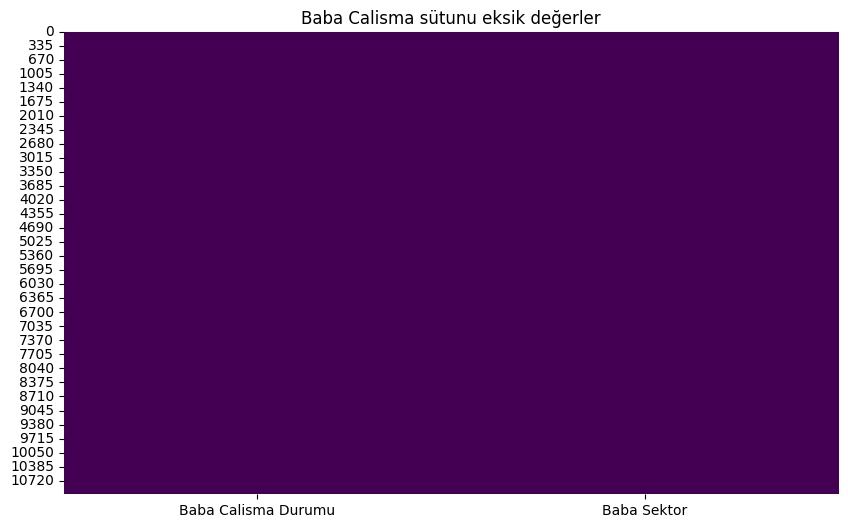

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eksik değerlerin ısı haritasını oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Baba Calisma Durumu', 'Baba Sektor']].isna(), cbar=False, cmap='viridis')

plt.title('Baba Calisma sütunu eksik değerler')
plt.show()


In [144]:
# 'Baba Calisma Durumu' sütunundaki 'Hayır','Evet' ve 'Emekli' değerlerini 0, 1 ve 2'ye dönüştürülür
df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\1525091089.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].replace({'Hayır': 0, 'Evet': 1, 'Emekli': 2})


## 'Baba Sektor'

In [145]:
df['Baba Sektor'].describe()

count     11049
unique        4
top           -
freq       4752
Name: Baba Sektor, dtype: object

In [146]:
df['Baba Sektor'].unique()

array(['Diğer', 'Özel Sektör', '-', 'Kamu'], dtype=object)

In [147]:
# 'Baba Sektor' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Baba Sektor'].isna().sum()
nan_count

0

In [148]:
#Eksik değerler '-' ile doldurulur
df['Baba Sektor'] = df['Baba Sektor'].fillna('-')

In [149]:

# Kategorileri gruplandır ve sayısallaştır
df['Baba Sektor Grup'] = df['Baba Sektor'].replace({
    '-' : 0, 
    'Kamu': 2, 
    'Özel Sektör' : 1,
    'Diğer' : 0, 
})

# Sonuçları görmek için
df['Baba Sektor Grup'].unique()


C:\Users\havva\AppData\Local\Temp\ipykernel_236\289165504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Baba Sektor Grup'] = df['Baba Sektor'].replace({


array([0, 1, 2], dtype=int64)

## 'Kardes Sayisi' sütunu

In [150]:
df['Kardes Sayisi'].describe()

count    11049.000000
mean         2.118563
std          1.256795
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Kardes Sayisi, dtype: float64

In [151]:
df['Kardes Sayisi'].unique()

array([2., 3., 0., 4., 1.])

In [152]:
# 'Kardes Sayisi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Kardes Sayisi'].isna().sum()
nan_count

0

In [153]:
#Eksik değerler 0 ile doldurulur
df['Kardes Sayisi'] = df['Kardes Sayisi'].fillna(0)

In [154]:
df['Kardes Sayisi'].shape

(11049,)

In [155]:
# Kategorileri gruplandır ve sayısallaştır
df['Kardes Sayisi'] = df['Kardes Sayisi'].replace({
    '1': 1, 
    '10': 10, 
    '3': 3,
    '4': 4, 
    '2': 2, 
    '5': 5, 
    '0': 0, 
    '7': 7, 
    '8': 8, 
    '6': 6, 
    '11': 11, 
    '9': 9,
    '12': 12, 
    '13': 13, 
    'Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat': 1, 
    '14':14,
    4.0: 4, 
    5.0: 5,
    1.0: 1, 
    2.0: 2, 
    6.0: 6, 
    3.0: 3, 
    9.0: 9, 
    0.0: 0, 
    10.0: 10, 
    7.0: 7, 
    8.0: 8,
    0 : 0
})

In [156]:
# Sütundaki farklı değerleri ve frekanslarını görme
deger_frekanslari2 = df['Kardes Sayisi'].value_counts()

# Tüm farklı değerleri ve frekanslarını görmek için
print(deger_frekanslari2.to_string())

Kardes Sayisi
1.0    3612
2.0    2821
4.0    2421
3.0    1490
0.0     705


## 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütunu

* Eksik değerler en çok tekrar eden 'Hayır' ile dolduruldu.
* One-hot encoding yöntemi ile sayısallaştırma yapıldı.

In [157]:
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].describe()

count     11049
unique        2
top       Hayır
freq       5940
Name: Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?, dtype: object

In [158]:
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [159]:
# 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].isna().sum()
nan_count

0

In [160]:
# 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\3376062674.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].replace({'Hayır': 0, 'Evet': 1})


## 'Uye Oldugunuz Kulubun Ismi' sütunu

In [161]:
df['Uye Oldugunuz Kulubun Ismi'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Uye Oldugunuz Kulubun Ismi, dtype: float64

In [162]:
df['Uye Oldugunuz Kulubun Ismi'].unique()

array([nan])

In [163]:
# 'Uye Oldugunuz Kulubun Ismi' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Uye Oldugunuz Kulubun Ismi'].isna().sum()
nan_count

11049

In [164]:
df['Kulup Ismi Grup'] = df['Uye Oldugunuz Kulubun Ismi']

In [165]:
# NaN değerlerin olup olmadığını kontrol etme
print(df['Kulup Ismi Grup'].isna().sum())

11049


In [166]:
# Eksik değerler '5.0' olarak doldurulur  / Train verisetinde boş değerler kümelemeye bu şekilde dahil edilmiştir
df['Kulup Ismi Grup'] = df['Kulup Ismi Grup'].fillna(5.0)

In [167]:
df['Kulup Ismi Grup'].unique()

array([5.])

In [168]:
df['Kulup Ismi Grup'].dtype

dtype('float64')

In [169]:
# 'Kulup Ismi Grup' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Kulup Ismi Grup'].isna().sum()
nan_count

0

In [170]:
# Verilerin sayısal türde olduğundan emin olduktan sonra int64'e dönüştürme
df['Kulup Ismi Grup'] = df['Kulup Ismi Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler


## 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütunu

In [171]:
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].describe()

count     11049
unique        2
top       Hayır
freq       6422
Name: Profesyonel Bir Spor Daliyla Mesgul musunuz?, dtype: object

In [172]:
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [173]:
# 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].isna().sum()
nan_count

0

In [174]:
# 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\3261885635.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].replace({'Hayır': 0, 'Evet': 1})


## 'Aktif olarak bir STK üyesi misiniz?' sütunu

In [175]:
df['Aktif olarak bir STK üyesi misiniz?'].describe()

count     11049
unique        2
top        Evet
freq       6270
Name: Aktif olarak bir STK üyesi misiniz?, dtype: object

In [176]:
df['Aktif olarak bir STK üyesi misiniz?'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [177]:
# 'Aktif olarak bir STK üyesi misiniz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Aktif olarak bir STK üyesi misiniz?'].isna().sum()
nan_count

0

In [178]:
# 'Aktif olarak bir STK üyesi misiniz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\945291136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Aktif olarak bir STK üyesi misiniz?'] = df['Aktif olarak bir STK üyesi misiniz?'].replace({'Hayır': 0, 'Evet': 1})


## 'Stk Projesine Katildiniz Mi?' sütunu

In [179]:
df['Stk Projesine Katildiniz Mi?'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Stk Projesine Katildiniz Mi?, dtype: float64

In [180]:
df['Stk Projesine Katildiniz Mi?'].unique()

array([nan])

In [181]:
# 'Stk Projesine Katildiniz Mi?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Stk Projesine Katildiniz Mi?'].isna().sum()
nan_count

11049

In [182]:
#Eksik değerler 'Hayır' ile doldurulur
df['Stk Projesine Katildiniz Mi?'] = df['Stk Projesine Katildiniz Mi?'].fillna('Hayır')

In [183]:
# 'Stk Projesine Katildiniz Mi?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Stk Projesine Katildiniz Mi?'] = df['Stk Projesine Katildiniz Mi?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\2169002519.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stk Projesine Katildiniz Mi?'] = df['Stk Projesine Katildiniz Mi?'].replace({'Hayır': 0, 'Evet': 1})


## 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütunu

In [184]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].describe()

count     11049
unique        2
top       Hayır
freq       7796
Name: Girisimcilikle Ilgili Deneyiminiz Var Mi?, dtype: object

In [185]:
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [186]:
# 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].isna().sum()
nan_count

0

In [187]:
# 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\2319523614.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'] = df['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].replace({'Hayır': 0, 'Evet': 1})


## 'Ingilizce Biliyor musunuz?' sütunu

In [188]:
df['Ingilizce Biliyor musunuz?'].describe()

count     11049
unique        2
top        Evet
freq       8863
Name: Ingilizce Biliyor musunuz?, dtype: object

In [189]:
df['Ingilizce Biliyor musunuz?'].unique()

array(['Evet', 'Hayır'], dtype=object)

In [190]:
# 'Ingilizce Biliyor musunuz?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Ingilizce Biliyor musunuz?'].isna().sum()
nan_count

0

In [191]:
# 'Ingilizce Biliyor musunuz?' sütunundaki 'Hayır' ve 'Evet' değerlerini 0 ve 1'e dönüştürülür
df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].replace({'Hayır': 0, 'Evet': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\2104668582.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ingilizce Biliyor musunuz?'] = df['Ingilizce Biliyor musunuz?'].replace({'Hayır': 0, 'Evet': 1})


## 'Ingilizce Seviyeniz?' sütunu

In [192]:
df['Ingilizce Seviyeniz?'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Ingilizce Seviyeniz?, dtype: float64

In [193]:
df['Ingilizce Seviyeniz?'].unique()

array([nan])

In [194]:
#Eksik değerler 'Bilmiyorum' ile doldurulur
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].fillna('Bilmiyorum')

In [195]:
df['Ingilizce Seviyeniz?'].value_counts()

Ingilizce Seviyeniz?
Bilmiyorum    11049
Name: count, dtype: int64

In [196]:
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].replace({0: 0,
                                                                 'Başlangıç': 0,
                                                                 'Bilmiyorum': 1, 
                                                                 'Orta': 1,
                                                                 'İleri': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\3175860179.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].replace({0: 0,


In [197]:
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].astype(float)

## Spor Dalindaki Rolunuz Nedir?

In [198]:
df['Spor Dalindaki Rolunuz Nedir?'].describe()

count     11049
unique        5
top           -
freq       6319
Name: Spor Dalindaki Rolunuz Nedir?, dtype: object

In [199]:
df['Spor Dalindaki Rolunuz Nedir?'].unique()

array(['Takım Oyuncusu', 'Bireysel Spor', '-', 'Lider/Kaptan', 'Diğer'],
      dtype=object)

In [200]:
# 'Spor Dalindaki Rolunuz Nedir?' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Spor Dalindaki Rolunuz Nedir?'].isna().sum()
nan_count

0

In [201]:
# Değerleri gruplandırmak için bir eşleme sözlüğü oluşturma
role_mapping = {
    'Lider/Kaptan': 'kaptan',
    'Bireysel Spor': 'bireysel',
    'Takım Oyuncusu': 'takım oyuncusu',
    'Diğer': 'diğer',
    '-': 'yok'
}

# Eşleme sözlüğünü kullanarak değerleri güncelleme
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace(role_mapping)

# Sonuçları kontrol etme
print(df['Spor Dalindaki Rolunuz Nedir?'].value_counts())

Spor Dalindaki Rolunuz Nedir?
yok               6319
bireysel          2509
takım oyuncusu    1428
kaptan             528
diğer              265
Name: count, dtype: int64


In [202]:
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace({'yok': 0,
                                                                 'bireysel': 1,
                                                                 'takım oyuncusu': 1, 
                                                                 'diğer': 1,
                                                                 'kaptan': 2})

C:\Users\havva\AppData\Local\Temp\ipykernel_236\3596965869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace({'yok': 0,


## 'Hangi STK'nin Uyesisiniz?'

In [203]:
df["Hangi STK'nin Uyesisiniz?"].describe()

count     11049
unique     6154
top           -
freq       4735
Name: Hangi STK'nin Uyesisiniz?, dtype: object

In [204]:
df["Hangi STK'nin Uyesisiniz?"].unique()

array(['Kızılay da gönüllü dağıtım', '-',
       'Lise gezilerde liderlik yapıyordum', ...,
       'Hayvanlara yardım adı altında hayvanlara yardım edip mama taşımıştım.',
       'Ağaç dikme, huzur evi ziyareti',
       "YetGen, YGA vb. programlarda yer aldım. Hacettepe Endüstri ve Sistem Topluluğun 'da 2021 yılında aktif üye olarak yer alırken 2022 -2023 eğitim öğretim yılı boyunca organizasyon birimi koordinatörlüğü yaptım. 2023-2024 eğitim öğretim yılında da Denetim Kurulu Başkanlığı yürüteceğim. Ayrıca Kalite Derneği GençKal Ankara'da da aktif üye olarak görev almaktayım."],
      dtype=object)

In [205]:
#Eksik değerler 'Hayır' ile doldurulur
df["Hangi STK'nin Uyesisiniz?"] = df["Hangi STK'nin Uyesisiniz?"].fillna('Hayır')

In [206]:
unique_list = df["Hangi STK'nin Uyesisiniz?"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/hangi_stk_uyesisiniz.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [207]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['stk_temp'] = df["Hangi STK'nin Uyesisiniz?"].fillna('Hayır')

# Verileri temizleme ve kümeleme
sentences = df['stk_temp'].unique()  # Unique değerleri alma

# 'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

# Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

# Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'stk': sentences_cleaned,
    'STK Üye Grup': kmeans.labels_
})

# Orijinal DataFrame'e küme etiketlerini ekleme
# 'Hayır' olan değerler için 'NaN' olarak işaretleme
df['STK Üye Grup'] = df['stk_temp'].map(df_clusters.set_index('stk')['STK Üye Grup']).fillna('5.0')

# Geçici sütunu kaldırma
df.drop(columns=['stk_temp'], inplace=True)

# DataFrame'i yazdırma
print(df.head())

   Basvuru Yili Cinsiyet  Dogum Tarihi Dogum Yeri Ikametgah Sehri  \
0          2023    Kadın          2002     Amasya          Amasya   
1          2023    Kadın          2004      Konya           Konya   
2          2023    Erkek          2002   İstanbul        İstanbul   
3          2023    Erkek          2003     Mardin          Mardin   
4          2023    Erkek          2002     Samsun        İstanbul   

                Universite Adi  Universite Turu  Burslu ise Burs Yuzdesi  \
0          Munzur Üniversitesi                0                      0.0   
1       Hacettepe Üniversitesi                0                      0.0   
2       Kapadokya Üniversitesi                1                      0.0   
3  Mardin Artuklu Üniversitesi                0                      0.0   
4        Boğaziçi Üniversitesi                0                      0.0   

   Burs Aliyor mu?                   Bölüm  ...  Burs Yuzdesi Grubu  \
0                0           Sosyal Hizmet  ...          

In [208]:
df['STK Üye Grup'].value_counts()

STK Üye Grup
2.0    8399
0.0    1562
4.0     408
3.0     391
1.0     287
5.0       2
Name: count, dtype: int64

In [209]:
# 'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['STK Üye Grup'] = pd.to_numeric(df['STK Üye Grup'], errors='coerce')

# Veri türlerini kontrol etme
print(df.dtypes)

# NaN değerlerin olup olmadığını kontrol etme
print(df['STK Üye Grup'].isna().sum())

Basvuru Yili                                                    int64
Cinsiyet                                                       object
Dogum Tarihi                                                    int32
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                        int64
Universite Not Ortalamasi                                       int64
Daha Once Baska Bir Universiteden Mezun Olmus                   int64
Lise Adi                                                       object
Lise Adi Diger      

In [210]:
# Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 4:
 - Kızılay da gönüllü dağıtım
 - Kızılay'da Kızılay haftasını okullara gezerek çocuklara anlatiyorduk.
 - Kızılay da gonulluyum
 - Kızılay ve AFAD
 - Kızılay ile birlikte köy okullarına ziyaret
 - Rehabilitasyon merkezinde gönüllü öğretmenlik yaptım ve kızılay da gönüllü olarak çalıştım.
 - Kızılay gsb
 - Kızılay bünyesinde farklı görevlerde bulundum.
 - Kızılay da yaşlılara yardım Üniversitede kariyer festivali Eskiz atölyesi
 - Gönüllü Kızılay ve okul yardimlari
 - Kızılay kurumunda gönüllü yardım faaliyetleri
 - Kızılay, Toplum Gönüllüleri Vakfı gibi kurumlarda gönüllü görevler aldım.
 - kızılay
 - Kızılay AFAD gibi gibi
 - Kızılay'ın etkinliklerine katılmaya calisiyorum
 - Kızılay
 - Kızılay yeşilay gibi kuruluşlara gönüllü olarak katıldım
 - Kızılay ve Tema gönüllüsüyüm. Kızılay ile birlikte Maraş depremi sırasında bölgede ilk günden başlayarak yaklaşık 1 ay yardım çalışmalarına katıldım. Okulumun Yönetim ve Bilişim topluluğunu kurdum, girişimcilik ve yazılım anlamında 

In [211]:
# Verilerin sayısal türde olduğundan emin olduktan sonra int64'e dönüştürme
df['STK Üye Grup'] = df['STK Üye Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler

In [212]:
df['STK Üye Grup'].dtype

Int64Dtype()

In [213]:
# 'STK Üye Grup' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['STK Üye Grup'].isna().sum()
nan_count

0

## 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'

In [214]:
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].describe()

count     11049
unique     3283
top           -
freq       7736
Name: Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?, dtype: object

In [215]:
df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].unique()

array(['-',
       '12 aydır, yolculuğuna bir yıl önce başlamış olan Finsmart adlı girişimde Growth Marketing Specialist Webflow Developer pozisyonunda çalışıyorum. Girişimin kuruluşundan büyüyüşüne kadar birçok görevde rol aldım ve birçok departmanı deneyimleme fırsatı elde ettim. Türkiye ve Polonya Girişimcilik ekosistemini yakından tanıma fırsatı yakaladım ve birçok girişimciyle tanıştım. Girişimimizde Çiğdem Toraman ve Suat Görgülü gibi sektöründeki güçlü isimlerle birebir çalışma ve deneyimlerinden faydalanarak kendime bir meslek edinme şansı elde ettim.',
       "TÜBİTAK 1512 kapsamında bir grup arkadaşımla beraber tutoring şirketi kurmak için başvuru yapmıştık. Şirketimizde tutoring yaparak öğreticiler kendilerine deneyim katacaktı aynı zamanda öğrenci-öğretici ilişkisini bizler kurmuş olacaktık. TÜBİTAK teknolojik bir yön de aradığından yapay zeka destekli bireyselleştirilmiş ders programları ve kazanım değerlendirmeleri eklemiştik fakat yapay zekayı destekleyecek veri tabanımı

In [216]:

unique_list = df["Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?"].unique()
# Benzersiz yanıtları bir txt dosyasına kaydet  # bu txt verierinden anahtar kelimeler çıkartılabilir
with open('txtler/girisimcilik_deneyim_aciklama_test.txt', 'w', encoding='utf-8') as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [217]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 'NaN' değerlerini geçici olarak 'Hayır' ile doldurma
df['g_temp'] = df["Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?"].fillna('Hayır')

# Verileri temizleme ve kümeleme
sentences = df['g_temp'].unique()  # Unique değerleri alma

# 'Hayır' değerlerini kümeleme işlemine dahil etmeme
sentences_cleaned = [sentence for sentence in sentences if sentence != 'Hayır']

# Metni vektör haline getirme
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_cleaned)

# Kümeleme için uygun küme sayısını belirleme
num_clusters = 5  # İhtiyaca göre ayarlayın
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Küme etiketlerini DataFrame'e ekleme
df_clusters = pd.DataFrame({
    'g': sentences_cleaned,
    'Girisimcilik Deneyim Grup': kmeans.labels_
})

# Orijinal DataFrame'e küme etiketlerini ekleme
# 'Hayır' olan değerler için 'NaN' olarak işaretleme
df['Girisimcilik Deneyim Grup'] = df['g_temp'].map(df_clusters.set_index('g')['Girisimcilik Deneyim Grup']).fillna('5.0')

# Geçici sütunu kaldırma
df.drop(columns=['g_temp'], inplace=True)

# DataFrame'i yazdırma
print(df.head())


   Basvuru Yili Cinsiyet  Dogum Tarihi Dogum Yeri Ikametgah Sehri  \
0          2023    Kadın          2002     Amasya          Amasya   
1          2023    Kadın          2004      Konya           Konya   
2          2023    Erkek          2002   İstanbul        İstanbul   
3          2023    Erkek          2003     Mardin          Mardin   
4          2023    Erkek          2002     Samsun        İstanbul   

                Universite Adi  Universite Turu  Burslu ise Burs Yuzdesi  \
0          Munzur Üniversitesi                0                      0.0   
1       Hacettepe Üniversitesi                0                      0.0   
2       Kapadokya Üniversitesi                1                      0.0   
3  Mardin Artuklu Üniversitesi                0                      0.0   
4        Boğaziçi Üniversitesi                0                      0.0   

   Burs Aliyor mu?                   Bölüm  ...  Bölüm Grup  \
0                0           Sosyal Hizmet  ...           2   
1 

In [218]:
df['Girisimcilik Deneyim Grup'].value_counts()

Girisimcilik Deneyim Grup
2.0    9146
1.0    1155
3.0     528
0.0     140
4.0      78
5.0       2
Name: count, dtype: int64

In [219]:
# 'kume' sütunundaki değerlerin sayısal türde olduğundan emin ol
df['Girisimcilik Deneyim Grup'] = pd.to_numeric(df['Girisimcilik Deneyim Grup'], errors='coerce')

# Veri türlerini kontrol etme
print(df.dtypes)

# NaN değerlerin olup olmadığını kontrol etme
print(df['Girisimcilik Deneyim Grup'].isna().sum())


Basvuru Yili                                                    int64
Cinsiyet                                                       object
Dogum Tarihi                                                    int32
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                        int64
Universite Not Ortalamasi                                       int64
Daha Once Baska Bir Universiteden Mezun Olmus                   int64
Lise Adi                                                       object
Lise Adi Diger      

In [220]:
# Grupları yazdırma
clusters = {}
for i, label in enumerate(kmeans.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(sentences[i])

for cluster_id, sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in sentences:
        print(f" - {sentence}")

Cluster 2:
 - -
 - Sadece lise yıllarımdan beri projeler geliştirip ilerletmeye çalışıyorum ve bu yıl birkaçıyla iki yarışmaya katıldım.
 - Teknofest projelerinde girişime dönüşebilecek projelerde yer aldım. Bu projelerden biri 2. oldu(BagTag).
 - Lise zamanımda babam market işletmeye girişmişti, ben de o marketi işletiyordum.
 - 2022 yazında bal ve ürünleri ticareti ile ilgili birşirket kurmak için pazar araştırması, müşteri analizini yaptım ayrıca destek alabilmek için KOSGEB geleneksel ve ileri düzey hirişimcilik sertifikalarını aldım ancak sermaye yetersizliği ve yüksek masraflar dolayısıyla şirketi açmadan sonlandırmak zorunda kaldım.
 - Yatırım, borsa vb
 - Dijital satış
 - Uçak modeli eğitimi
 - Taşıt al satımı
 - Girişimciliğe merakım hep vardı çünkü ülkenin malum sartlarundan kurtulmanın tek yolu buydu bu zamana kadar kendi çapımda bircok girişimim oldu ama bunları daha da geliştirip global piyasaya da açılmak istiyorum
 - Resimlerimden pay elde edebileceğim bir küçük işletme 

In [221]:
# Verilerin sayısal türde olduğundan emin olduktan sonra int64'e dönüştürme
df['Girisimcilik Deneyim Grup'] = df['Girisimcilik Deneyim Grup'].astype('Int64')  # Int64 türü, NaN değerleri destekler

In [222]:
df['Girisimcilik Deneyim Grup'].dtype

Int64Dtype()

In [223]:

# 'Girisimcilik Deneyim Grup' sütunundaki NaN değerlerinin sayısını öğrenme
nan_count = df['Girisimcilik Deneyim Grup'].isna().sum()
nan_count

0

## 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite' sütunu

In [224]:
df['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite, dtype: float64

In [225]:
df['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'].unique()

array([nan])

In [226]:
df['Mezun Uni Grup'] = df['Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']

In [227]:
df['Mezun Uni Grup'].unique()

array([nan])

In [228]:
# Diğer üniler için değerler 0 ile doldurulur
df['Mezun Uni Grup'] = df['Mezun Uni Grup'].fillna(0)

## Özellik Çıkarımı

In [229]:
df.isna().sum()

Basvuru Yili                                                     0
Cinsiyet                                                         0
Dogum Tarihi                                                     0
Dogum Yeri                                                       0
Ikametgah Sehri                                                  0
Universite Adi                                                   0
Universite Turu                                                  0
Burslu ise Burs Yuzdesi                                          0
Burs Aliyor mu?                                                  0
Bölüm                                                            0
Universite Kacinci Sinif                                         0
Universite Not Ortalamasi                                        0
Daha Once Baska Bir Universiteden Mezun Olmus                    0
Lise Adi                                                         0
Lise Adi Diger                                               1

## 'Aktif Katilim'

In [230]:
#Yeni sütunu oluşturmak için bir fonksiyon
def create_new_column(row):
    return row[['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
                'Aktif olarak bir STK üyesi misiniz?',
                'Stk Projesine Katildiniz Mi?',
                'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
                'Profesyonel Bir Spor Daliyla Mesgul musunuz?']].tolist().count(1)

#Yeni sütunu DataFrame'e ekleyin
df['Aktif Katilim'] = df.apply(create_new_column, axis=1)
df['Aktif Katilim'].uniqu


In [ ]:
df['Aktif Katilim'].uniqu

## Makine Öğrenimi İçin Özellik Seçimi

In [237]:
df.dtypes

Basvuru Yili                                                    int64
Cinsiyet                                                       object
Dogum Tarihi                                                    int32
Dogum Yeri                                                     object
Ikametgah Sehri                                                object
Universite Adi                                                 object
Universite Turu                                                 int64
Burslu ise Burs Yuzdesi                                       float64
Burs Aliyor mu?                                                 int64
Bölüm                                                          object
Universite Kacinci Sinif                                        int64
Universite Not Ortalamasi                                       int64
Daha Once Baska Bir Universiteden Mezun Olmus                   int64
Lise Adi                                                       object
Lise Adi Diger      

In [238]:
# Korelasyon 0.1'den büyük
#String ifade içeren sütunlar çıkarılır
numeric_data1 = df[['Ikametgah Bolgesi',
                    'Ikametgah Sehri Kademe Puani',
                    'Uni Grup',
                    'Universite Turu',
                    'Burs Yuzdesi Grubu',
                    'Universite Kacinci Sinif',
                    'Universite Not Ortalamasi',
                    'Lise Mezuniyet Notu Grup',
                    'Anne Egitim Durumu Grup',
                    'Anne Calisma Durumu',  
                    'Anne Sektor Grup', 
                    'Baba Egitim Durumu Grup',
                    'Baba Sektor Grup',
                    'Kardes Sayisi',
                    'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
                    'Kulup Ismi Grup',	
                    'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
                    'Aktif olarak bir STK üyesi misiniz?',
                    'Stk Projesine Katildiniz Mi?',
                    'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
                    'Ingilizce Biliyor musunuz?',
                    'Ingilizce Seviyeniz?',
                    'Spor Dalindaki Rolunuz Nedir?',
                    'STK Üye Grup',
                    'Aktif Katilim']]

In [239]:
numeric_data1.dtypes

Ikametgah Bolgesi                                          int64
Ikametgah Sehri Kademe Puani                               int64
Uni Grup                                                 float64
Universite Turu                                            int64
Burs Yuzdesi Grubu                                      category
Universite Kacinci Sinif                                   int64
Universite Not Ortalamasi                                  int64
Lise Mezuniyet Notu Grup                                   int64
Anne Egitim Durumu Grup                                    int64
Anne Calisma Durumu                                        int64
Anne Sektor Grup                                           int64
Baba Egitim Durumu Grup                                    int64
Baba Sektor Grup                                           int64
Kardes Sayisi                                            float64
Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?       int64
Kulup Ismi Grup          

In [240]:
numeric_data1.corr()

,Ikametgah Bolgesi,Ikametgah Sehri Kademe Puani,Uni Grup,Universite Turu,Burs Yuzdesi Grubu,Universite Kacinci Sinif,Universite Not Ortalamasi,Lise Mezuniyet Notu Grup,Anne Egitim Durumu Grup,Anne Calisma Durumu,...,Kulup Ismi Grup,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Aktif olarak bir STK üyesi misiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,Spor Dalindaki Rolunuz Nedir?,STK Üye Grup,Aktif Katilim
Ikametgah Bolgesi,1.000000,-0.872589,0.171404,0.236854,NaN,0.102483,0.102483,NaN,0.340055,0.226910,...,NaN,0.094805,0.124099,NaN,0.138632,0.308194,NaN,0.083085,-0.110373,0.215153
Ikametgah Sehri Kademe Puani,-0.872589,1.000000,-0.177474,-0.261937,NaN,-0.121012,-0.121012,NaN,-0.386089,-0.251947,...,NaN,-0.108965,-0.138459,NaN,-0.152619,-0.341747,NaN,-0.099342,0.126819,-0.235726
Uni Grup,0.171404,-0.177474,1.000000,-0.234063,NaN,0.064946,0.064946,NaN,0.077633,0.029226,...,NaN,0.021047,0.042817,NaN,0.026708,0.096672,NaN,0.008962,-0.046552,0.052469
Universite Turu,0.236854,-0.261937,-0.234063,1.000000,NaN,0.002002,0.002002,NaN,0.210764,0.137502,...,NaN,0.043869,0.083594,NaN,0.100892,0.140347,NaN,0.046067,-0.082238,0.145610
Burs Yuzdesi Grubu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Universite Kacinci Sinif,0.102483,-0.121012,0.064946,0.002002,NaN,1.000000,1.000000,NaN,0.048104,0.018839,...,NaN,0.022388,0.157845,NaN,0.068701,0.076675,NaN,0.018163,-0.081946,0.098409
Universite Not Ortalamasi,0.102483,-0.121012,0.064946,0.002002,NaN,1.000000,1.000000,NaN,0.048104,0.018839,...,NaN,0.022388,0.157845,NaN,0.068701,0.076675,NaN,0.018163,-0.081946,0.098409
Lise Mezuniyet Notu Grup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anne Egitim Durumu Grup,0.340055,-0.386089,0.077633,0.210764,NaN,0.048104,0.048104,NaN,1.000000,0.427863,...,NaN,0.125499,0.128147,NaN,0.144340,0.278614,NaN,0.117177,-0.133588,0.215943
Anne Calisma Durumu,0.226910,-0.251947,0.029226,0.137502,NaN,0.018839,0.018839,NaN,0.427863,1.000000,...,NaN,0.057105,0.069066,NaN,0.081310,0.159984,NaN,0.051477,-0.085944,0.116332


In [243]:
# Korelasyon 0.2'den büyük
#String ifade içeren sütunlar çıkarılır
numeric_data2 = df[['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?', 
                    'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 
                    'Aktif olarak bir STK üyesi misiniz?', 
                    'Stk Projesine Katildiniz Mi?', 
                    'Lise Mezuniyet Notu Grup', 
                    'Aktif Katilim']]

In [245]:
# DataFrame'i CSV dosyasına kaydet
numeric_data1.to_csv('dataset/test_new.csv', index=False)

print("CSV dosyasına başarıyla kaydedildi.")

CSV dosyasına başarıyla kaydedildi.
